<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_150-200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [326]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [327]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

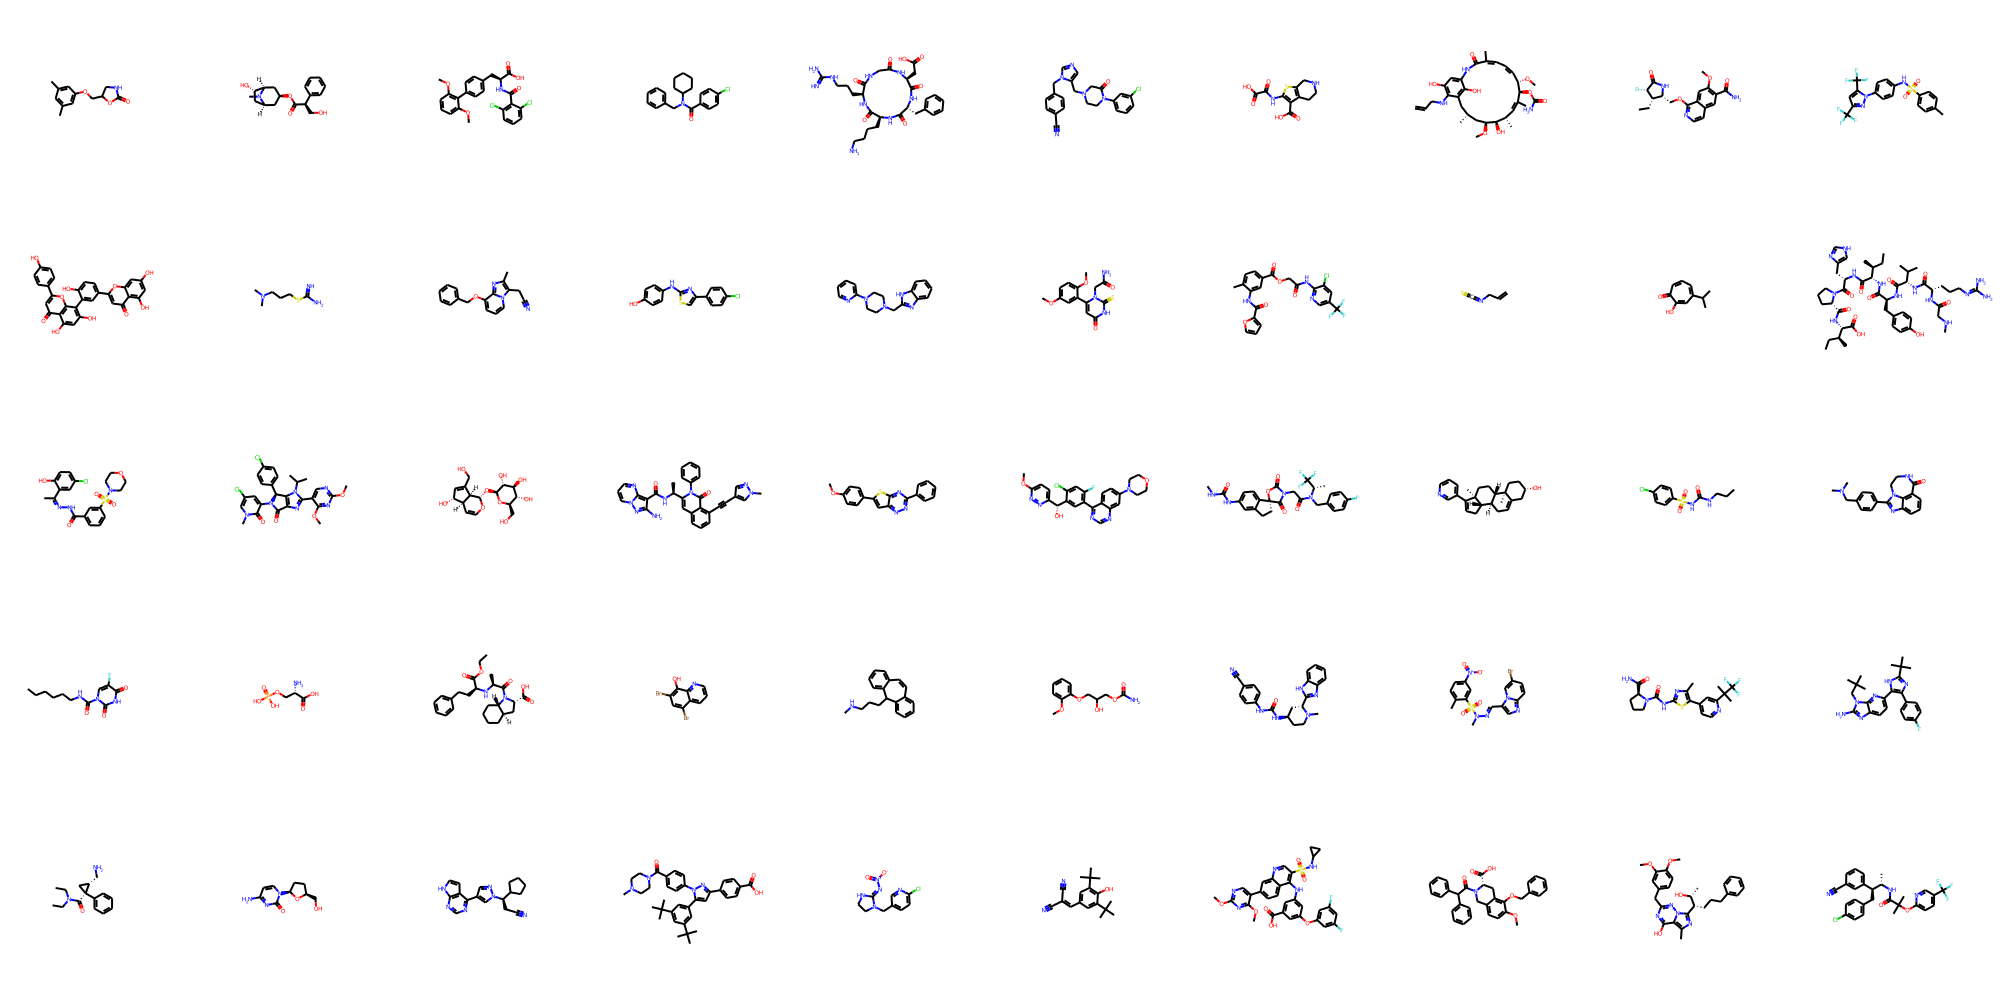

In [330]:
smiles_list = ['Cc1cc(C)cc(OCC2CNC(=O)O2)c1',
'CN1[C@H]2C[C@H](OC(=O)[C@H](CO)c3ccccc3)C[C@@H]1[C@@H](O)C2',
'COc1cccc(OC)c1-c1ccc(C[C@H](NC(=O)c2c(Cl)cccc2Cl)C(=O)O)cc1',
'O=C(c1ccc(Cl)cc1)N(Cc1ccccc1)C1CCCCC1',
'N=C(N)NCCC[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H](Cc2ccccc2)NC(=O)[C@H](CC(=O)O)NC(=O)CNC1=O',
'N#Cc1ccc(Cn2cncc2CN2CCN(c3cccc(Cl)c3)C(=O)C2)cc1',
'O=C(O)C(=O)Nc1sc2c(c1C(=O)O)CCNC2',
'C=CCNc1c(O)cc2c(O)c1C[C@@H](C)C[C@H](OC)[C@H](O)[C@@H](C)/C=C(\C)[C@H](OC(N)=O)[C@@H](OC)/C=C\C=C(/C)C(=O)N2',
'CC[C@H]1[C@@H](COc2nccc3cc(C(N)=O)c(OC)cc23)NC(=O)[C@H]1F',
'Cc1ccc(S(=O)(=O)Nc2ccc(-n3nc(C(F)(F)F)cc3C(F)(F)F)cc2)cc1',
'O=c1cc(-c2ccc(O)c(-c3c(O)cc(O)c4c(=O)cc(-c5ccc(O)cc5)oc34)c2)oc2cc(O)cc(O)c12',
'CN(C)CCCSC(=N)N',
'Cc1nc2c(OCc3ccccc3)cccn2c1CC#N',
'Oc1ccc(Nc2nc(-c3ccc(Cl)cc3)cs2)cc1',
'c1ccc(N2CCN(Cc3nc4ccccc4[nH]3)CC2)nc1',
'COc1ccc(OC)c(-c2cc(=O)[nH]c(=S)n2CC(N)=O)c1',
'Cc1ccc(C(=O)OCC(=O)Nc2ncc(C(F)(F)F)cc2Cl)cc1NC(=O)c1ccco1',
'C=CCN=C=S',
'CC(C)c1cccc(=O)c(O)c1',
'CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](Cc1c[nH]cn1)NC(=O)[C@@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)[C@@H](NC(=O)[C@H](CCCN=C(N)N)NC(=O)CNC)C(C)C)[C@@H](C)CC)C(=O)O',
'C/C(=NNC(=O)c1cccc(S(=O)(=O)N2CCOCC2)c1)c1cc(Cl)ccc1O',
'COc1ncc(-c2nc3c(n2C(C)C)[C@H](c2ccc(Cl)cc2)N(c2cc(Cl)cn(C)c2=O)C3=O)c(OC)n1',
'OCC1=C[C@@H](O)[C@@H]2C=CO[C@@H](O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3O)[C@H]12',
'C[C@H](NC(=O)c1c(N)nn2cccnc12)c1cc2cccc(C#Cc3cnn(C)c3)c2c(=O)n1-c1ccccc1',
'COc1ccc(-c2cc3nnc(-c4ccccc4)nc3s2)cc1',
'COc1ccc([C@@H](O)c2cc(-c3ncnc4cc(N5CCOCC5)ccc34)c(F)cc2Cl)nn1',
'CNC(=O)Nc1ccc2c(c1)CC[C@@]21OC(=O)N(CC(=O)N(Cc2ccc(F)cc2)[C@@H](C)C(F)(F)F)C1=O',
'C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC=C2c1cccnc1',
'CCCNC(=O)NS(=O)(=O)c1ccc(Cl)cc1',
'CN(C)Cc1ccc(-c2nc3cccc4c3n2CCNC4=O)cc1',
'CCCCCCNC(=O)n1cc(F)c(=O)[nH]c1=O',
'N[C@@H](COP(=O)(O)O)C(=O)O',
'CCOC(=O)[C@H](CCc1ccccc1)N[C@@H](C)C(=O)N1[C@H](C(=O)O)C[C@H]2CCCC[C@@H]21',
'Oc1c(Br)cc(Br)c2cccnc12',
'CNCCCC1c2ccccc2C=Cc2ccccc21',
'COc1ccccc1OCC(O)COC(N)=O',
'CN1CC[C@@H](NC(=O)Nc2ccc(C#N)cc2)C[C@@H]1c1nc2ccccc2[nH]1',
'Cc1ccc([N+](=O)[O-])cc1S(=O)(=O)N(C)/N=C/c1cnc2ccc(Br)cn12',
'Cc1nc(NC(=O)N2CCC[C@H]2C(N)=O)sc1-c1ccnc(C(C)(C)C(F)(F)F)c1',
'CC(C)(C)Cn1c(N)nc2ccc(-c3[nH]c(C(C)(C)C)nc3-c3ccc(F)cc3)nc21',
'CCN(CC)C(=O)[C@]1(c2ccccc2)C[C@@H]1CN',
'Nc1ccn([C@H]2CC[C@@H](CO)O2)c(=O)n1',
'N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1',
'CN1CCN(C(=O)c2ccc(-n3nc(-c4ccc(C(=O)O)cc4)cc3-c3cc(C(C)(C)C)cc(C(C)(C)C)c3)cc2)CC1',
'O=[N+]([O-])/N=C1NCCN1Cc1ccc(Cl)nc1',
'CC(C)(C)c1cc(C=C(C#N)C#N)cc(C(C)(C)C)c1O',
'COc1ncc(-c2ccc3c(Nc4cc(Oc5cc(F)cc(F)c5)cc(C(=O)O)c4)c(S(=O)(=O)NC4CC4)cnc3c2)c(OC)n1',
'COc1ccc2c(c1OCc1ccccc1)C[C@@H](C(=O)O)N(C(=O)C(c1ccccc1)c1ccccc1)C2',
'COc1ccc(Cc2nc(O)c3c(C)nc([C@@H](CCCc4ccccc4)[C@@H](C)O)n3n2)cc1OC',
'C[C@H](NC(=O)C(C)(C)Oc1ccc(C(F)(F)F)cn1)[C@@H](Cc1ccc(Cl)cc1)c1cccc(C#N)c1',

]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



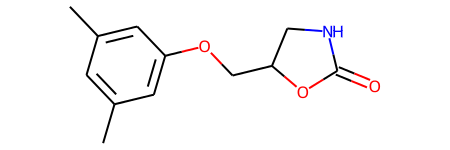

In [331]:
M1 = mol_list [0]
M1

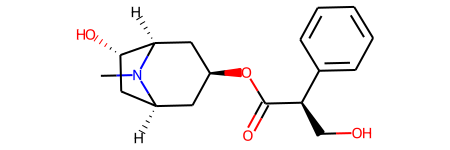

In [332]:
M2 = mol_list [1]
M2

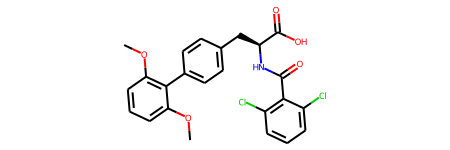

In [333]:
M3 = mol_list [2]
M3

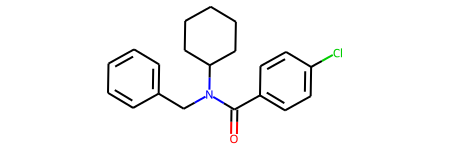

In [334]:
M4 = mol_list [3]
M4

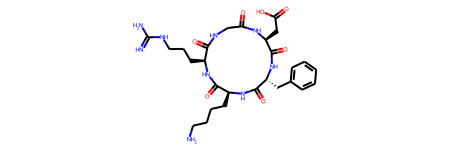

In [335]:
M5 = mol_list [4]
M5

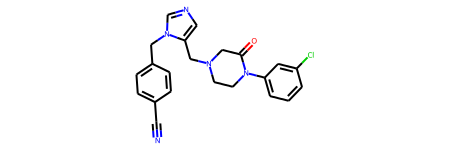

In [336]:
M6 = mol_list [5]
M6

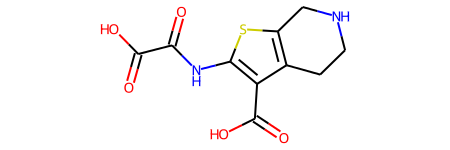

In [337]:
M7 = mol_list [6]
M7

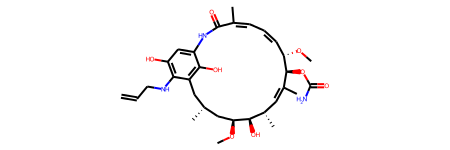

In [338]:
M8 = mol_list [7]
M8

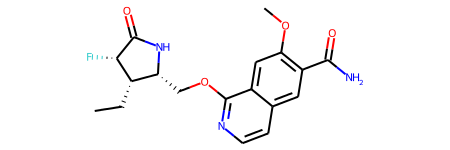

In [339]:
M9 = mol_list [8]
M9

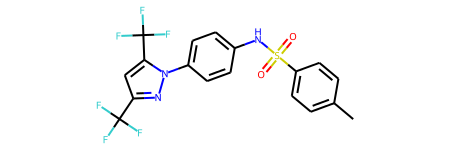

In [340]:
M10= mol_list [9]
M10

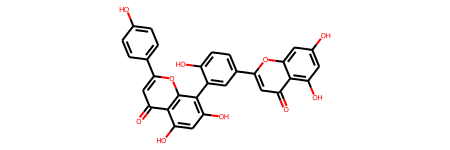

In [341]:
M11= mol_list [10]
M11

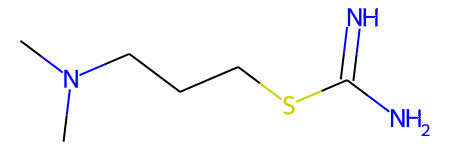

In [342]:
M12= mol_list [11]
M12

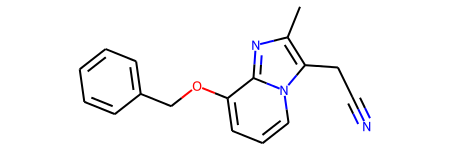

In [343]:
M13= mol_list [12]
M13

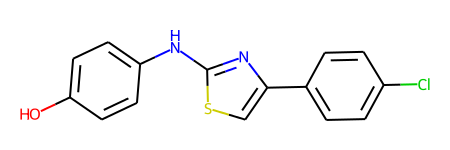

In [344]:
M14= mol_list [13]
M14

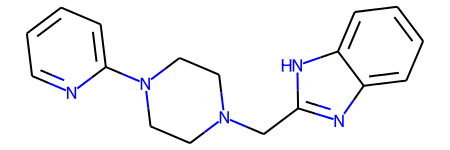

In [345]:
M15= mol_list [14]
M15

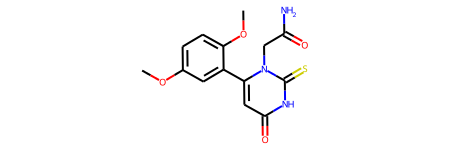

In [346]:
M16= mol_list [15]
M16

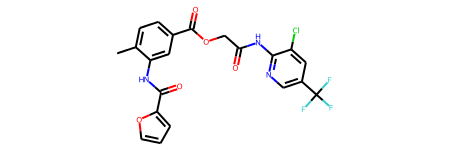

In [347]:
M17= mol_list [16]
M17

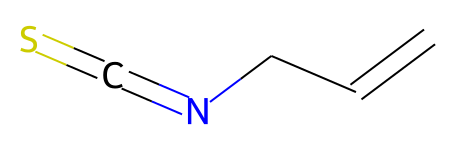

In [348]:
M18= mol_list [17]
M18

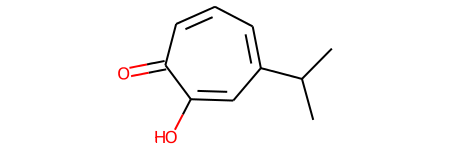

In [349]:
M19= mol_list [18]
M19

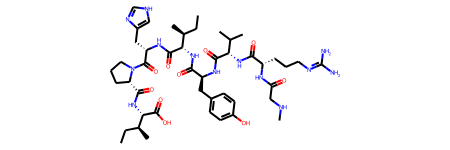

In [350]:
M20= mol_list [19]
M20

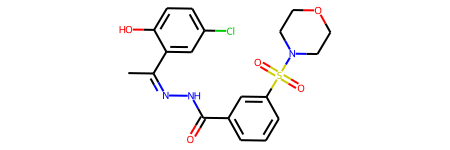

In [351]:
M21= mol_list [20]
M21

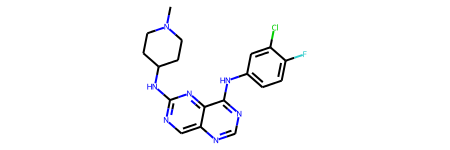

In [352]:
M22= mol_list [21]
M23

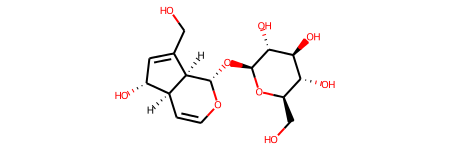

In [353]:
M23= mol_list [22]
M23

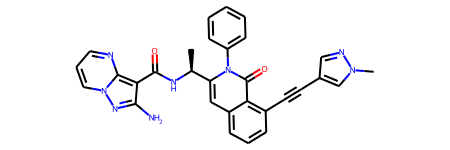

In [354]:
M24= mol_list [23]
M24

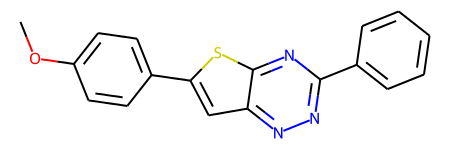

In [355]:
M25= mol_list [24]
M25

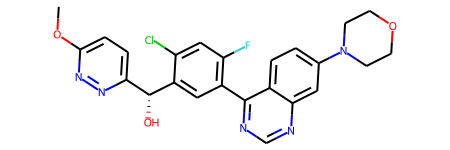

In [356]:
M26= mol_list [25]
M26

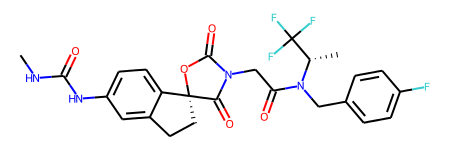

In [357]:
M27= mol_list [26]
M27

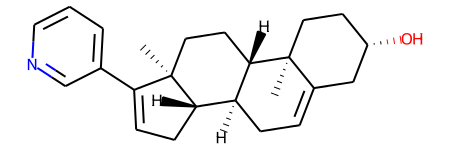

In [358]:
M28= mol_list [27]
M28

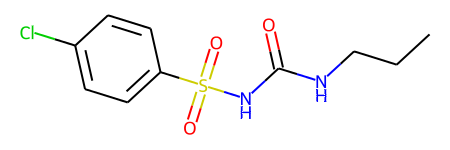

In [359]:
M29= mol_list [28]
M29

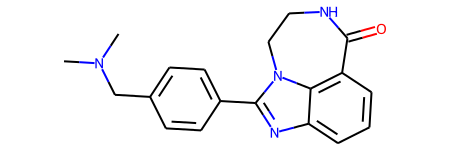

In [360]:
M30= mol_list [29]
M30

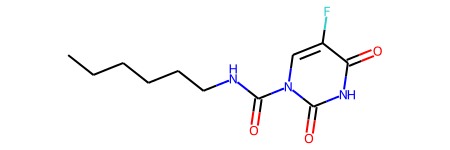

In [361]:
M31= mol_list [30]
M31

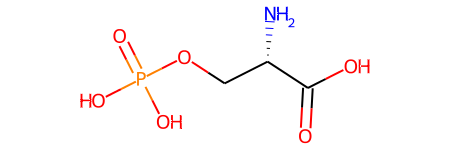

In [362]:
M32= mol_list [31]
M32

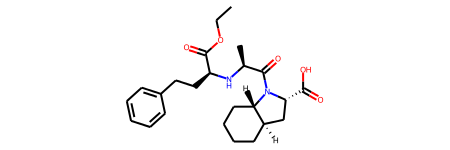

In [363]:
M33= mol_list [32]
M33

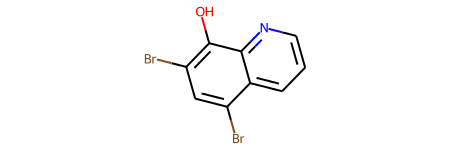

In [364]:
M34= mol_list [33]
M34

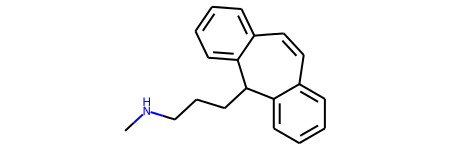

In [365]:
M35= mol_list [34]
M35

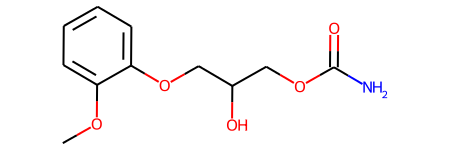

In [366]:
M36= mol_list [35]
M36

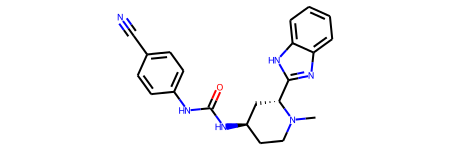

In [367]:
M37= mol_list [36]
M37

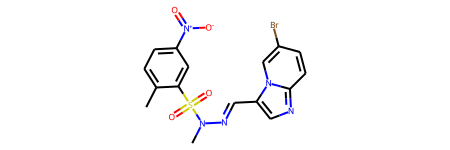

In [368]:
M38= mol_list [37]
M38


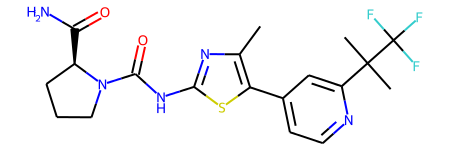

In [369]:
M39= mol_list [38]
M39

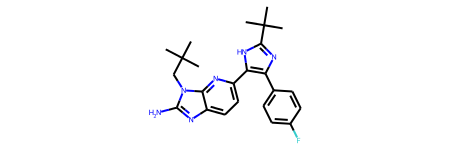

In [370]:
M40= mol_list [39]
M40

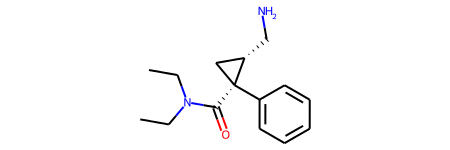

In [371]:
M41= mol_list [40]
M41

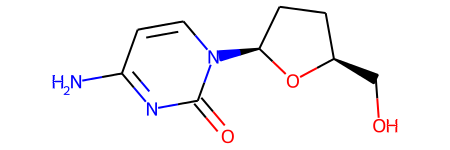

In [372]:
M42= mol_list [41]
M42

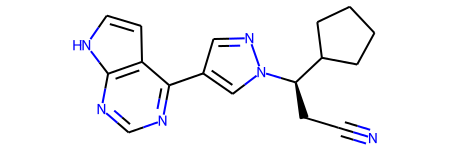

In [373]:
M43= mol_list [42]
M43

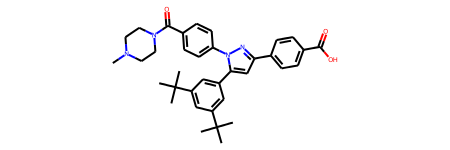

In [374]:
M44= mol_list [43]
M44

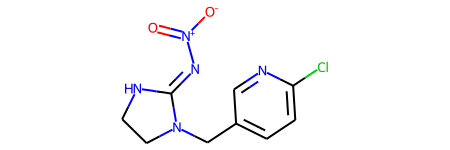

In [375]:
M45= mol_list [44]
M45

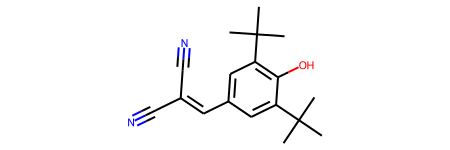

In [376]:
M46= mol_list [45]
M46

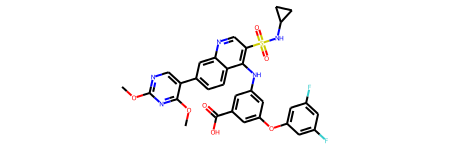

In [377]:
M47= mol_list [46]
M47

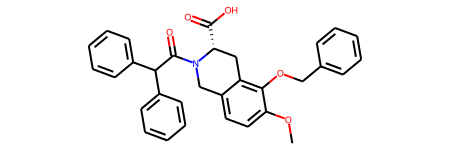

In [378]:
M48= mol_list [47]
M48

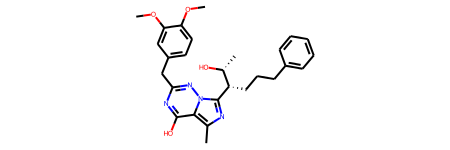

In [379]:
M49= mol_list [48]
M49

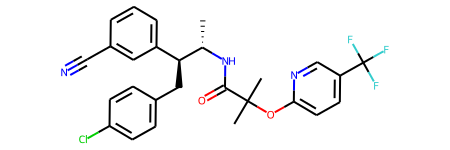

In [380]:
M50= mol_list [49]
M50

In [381]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[33,
 80,
 90,
 112,
 264,
 314,
 322,
 356,
 367,
 428,
 444,
 470,
 476,
 512,
 610,
 628,
 650,
 656,
 695,
 698,
 749,
 750,
 799,
 842,
 849,
 875,
 887,
 888,
 912,
 926,
 929,
 938,
 1019]

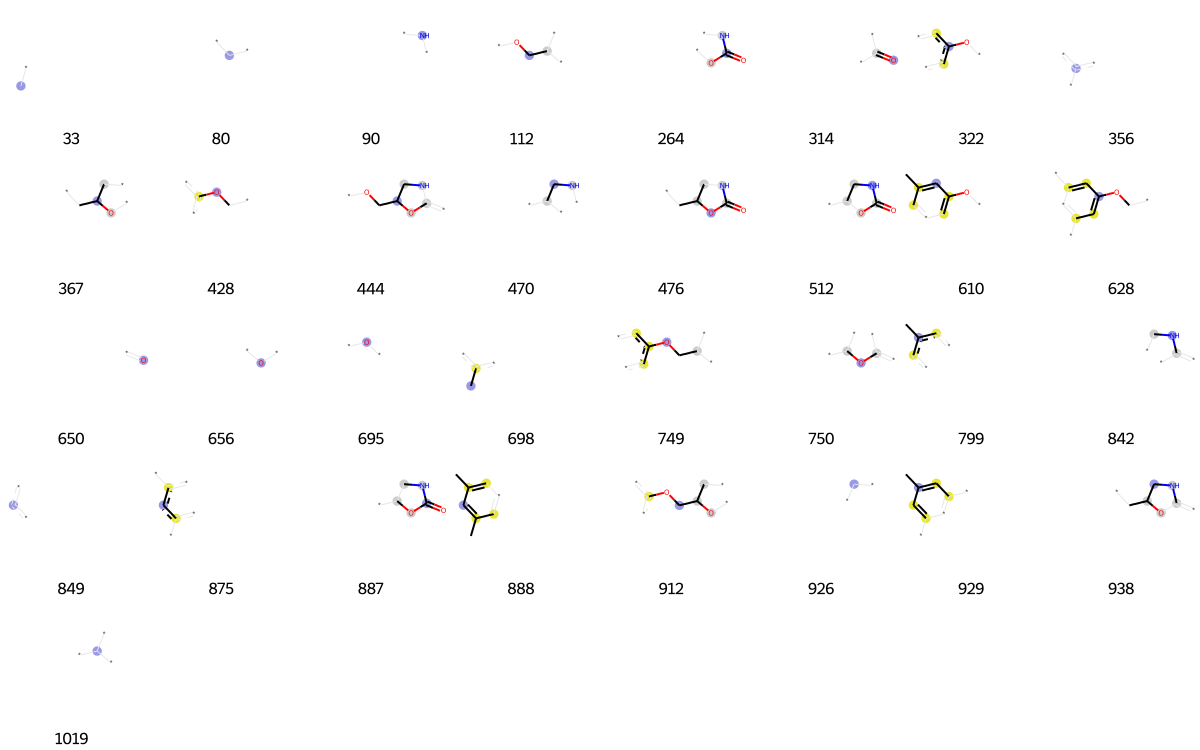

In [382]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [383]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[33,
 80,
 90,
 112,
 264,
 314,
 322,
 356,
 367,
 428,
 444,
 470,
 476,
 512,
 610,
 628,
 650,
 656,
 695,
 698,
 749,
 750,
 799,
 842,
 849,
 875,
 887,
 888,
 912,
 926,
 929,
 938,
 1019]

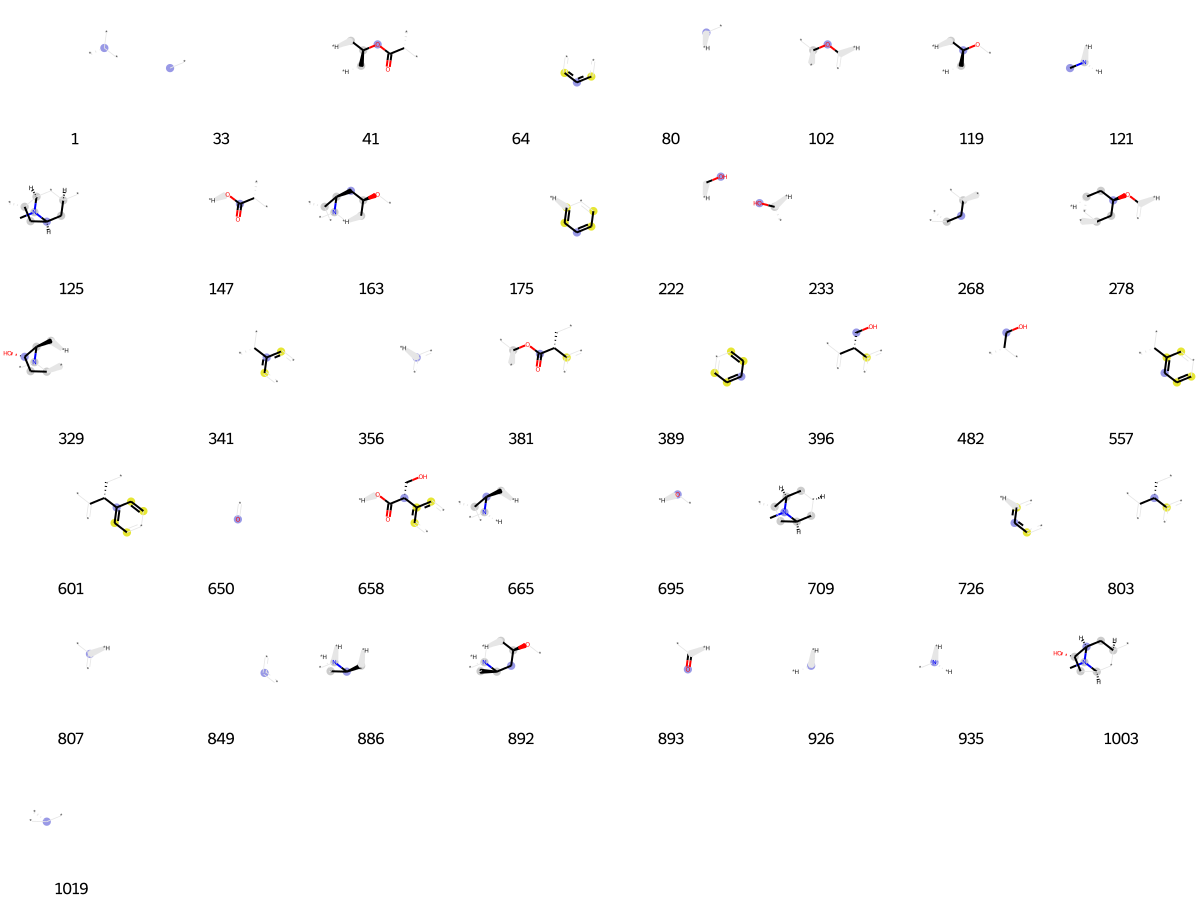

In [384]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [385]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 15,
 33,
 64,
 79,
 80,
 117,
 128,
 136,
 249,
 310,
 356,
 366,
 386,
 389,
 411,
 419,
 486,
 495,
 512,
 558,
 561,
 586,
 600,
 624,
 650,
 659,
 695,
 723,
 726,
 730,
 736,
 807,
 820,
 841,
 849,
 851,
 857,
 893,
 896,
 946,
 965,
 974,
 982]

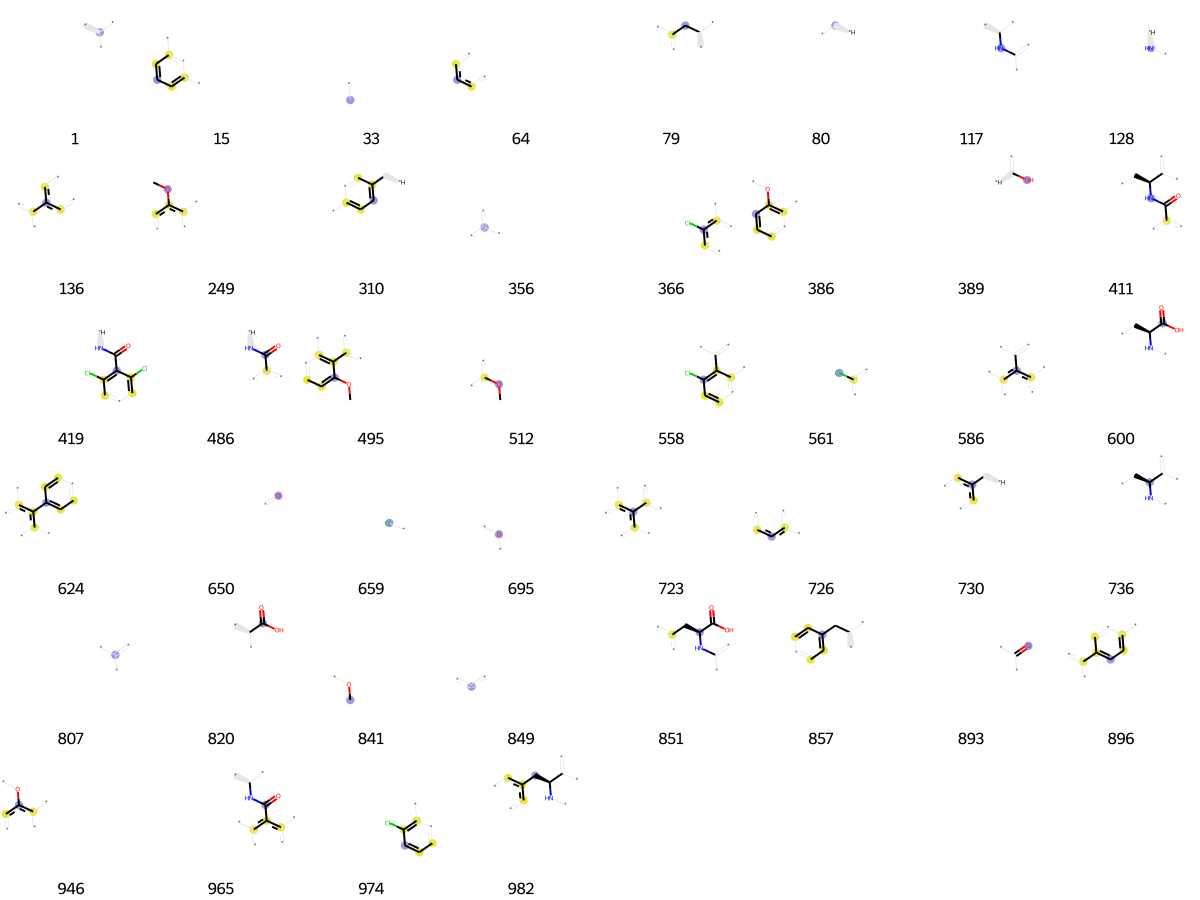

In [386]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [387]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[2,
 4,
 39,
 41,
 42,
 46,
 64,
 80,
 123,
 175,
 197,
 216,
 301,
 356,
 361,
 389,
 404,
 507,
 561,
 587,
 650,
 659,
 662,
 673,
 726,
 730,
 807,
 809,
 816,
 849,
 881,
 890,
 893,
 926,
 1012,
 1019]

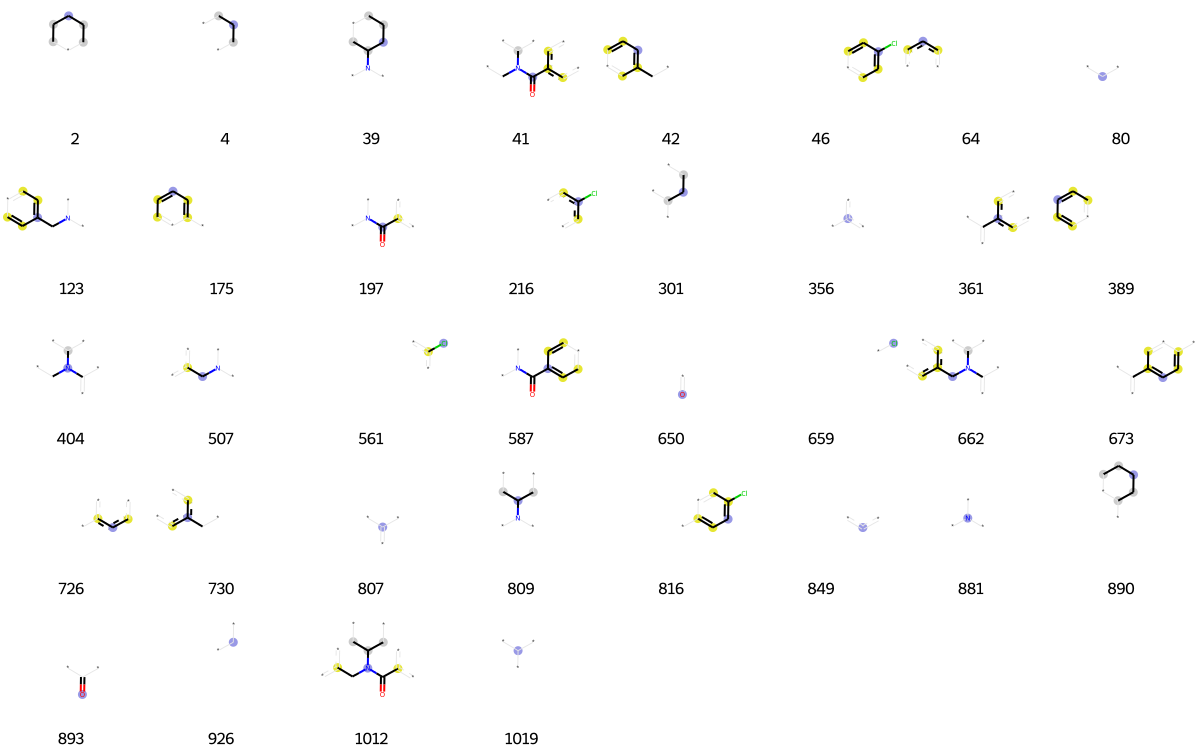

In [388]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [389]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[10,
 42,
 58,
 64,
 80,
 90,
 115,
 128,
 140,
 147,
 175,
 197,
 301,
 314,
 334,
 355,
 356,
 389,
 427,
 432,
 435,
 440,
 458,
 493,
 503,
 551,
 623,
 650,
 665,
 667,
 684,
 713,
 722,
 726,
 730,
 758,
 793,
 807,
 816,
 832,
 842,
 849,
 852,
 887,
 893,
 894,
 895,
 926,
 954,
 957,
 981,
 983,
 998,
 1004,
 1006,
 1019]

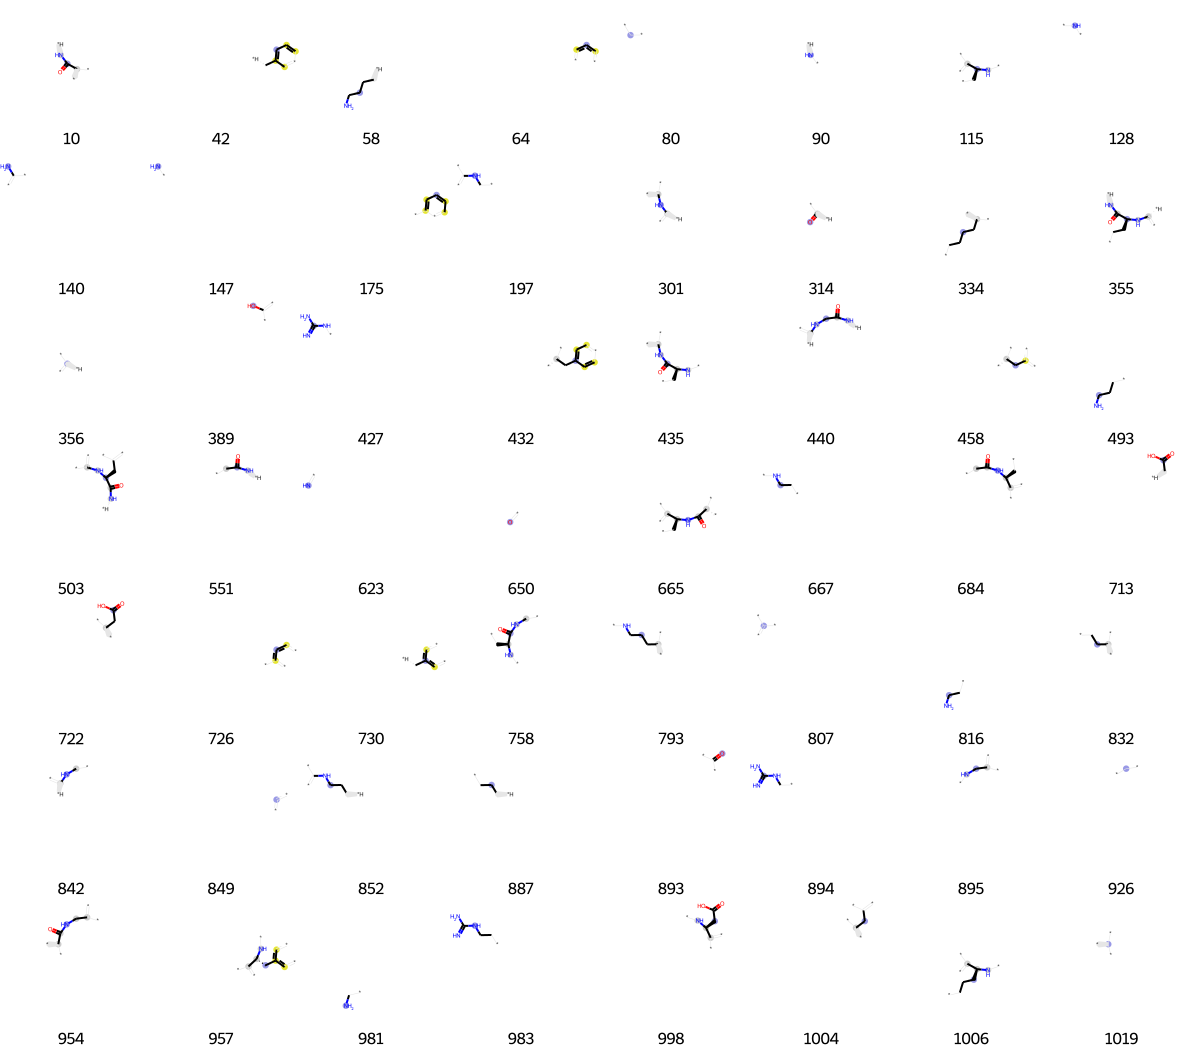

In [390]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [391]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[9,
 12,
 15,
 25,
 34,
 64,
 74,
 78,
 80,
 102,
 112,
 165,
 203,
 216,
 305,
 310,
 314,
 356,
 360,
 378,
 391,
 431,
 433,
 449,
 455,
 456,
 499,
 511,
 526,
 542,
 561,
 579,
 592,
 617,
 650,
 659,
 674,
 710,
 726,
 730,
 741,
 767,
 790,
 798,
 801,
 811,
 849,
 875,
 922,
 926,
 930,
 932,
 935,
 952]

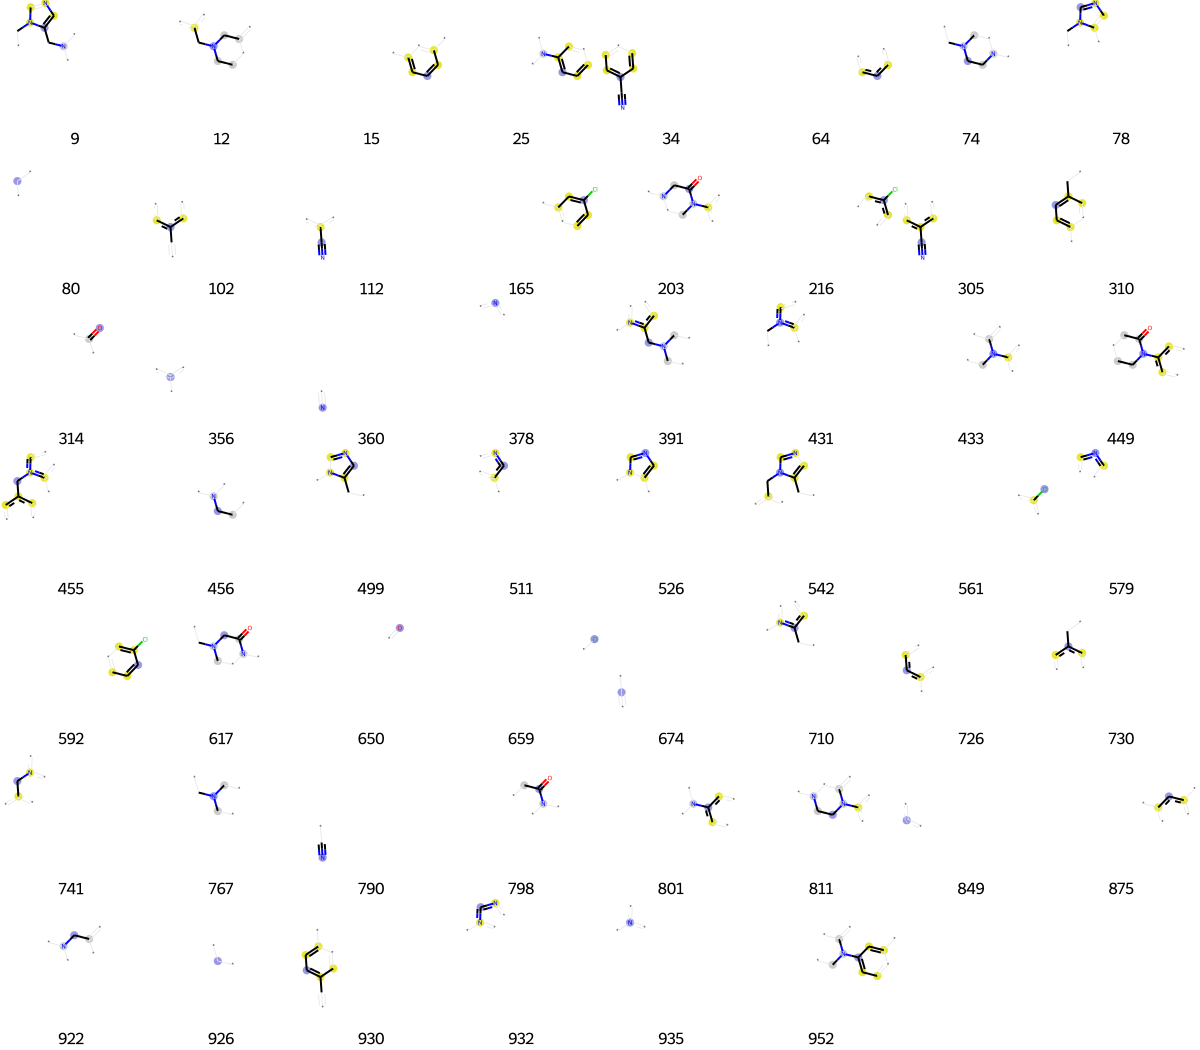

In [392]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [393]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[42,
 50,
 90,
 128,
 162,
 186,
 202,
 216,
 231,
 284,
 305,
 356,
 361,
 389,
 446,
 456,
 586,
 598,
 650,
 675,
 714,
 720,
 792,
 807,
 809,
 812,
 851,
 893,
 895,
 926,
 945,
 955,
 966,
 1000]

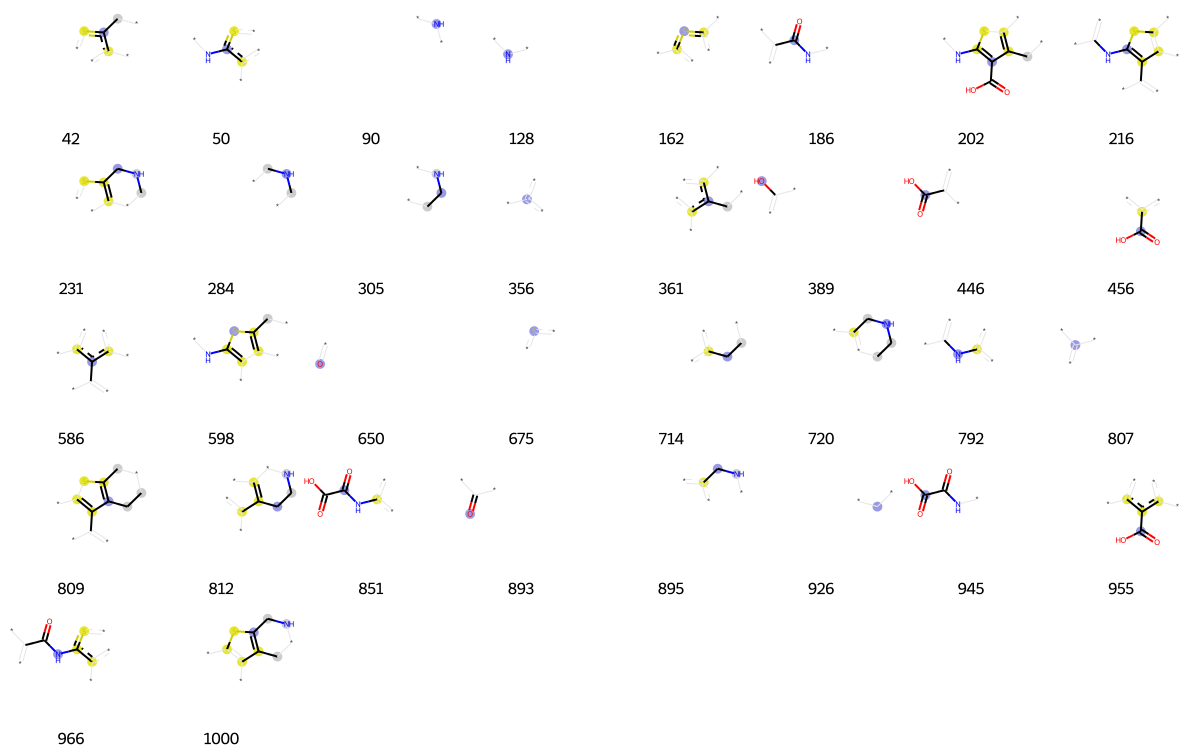

In [394]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [395]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[7,
 33,
 36,
 53,
 59,
 60,
 73,
 80,
 90,
 102,
 106,
 121,
 124,
 128,
 140,
 147,
 171,
 202,
 225,
 231,
 233,
 268,
 278,
 284,
 285,
 294,
 306,
 314,
 322,
 342,
 356,
 361,
 368,
 381,
 392,
 397,
 410,
 463,
 487,
 527,
 537,
 551,
 578,
 583,
 599,
 606,
 609,
 621,
 633,
 650,
 694,
 695,
 698,
 706,
 713,
 739,
 744,
 745,
 750,
 756,
 777,
 798,
 801,
 807,
 841,
 849,
 862,
 871,
 875,
 893,
 911,
 918,
 922,
 926,
 927,
 937,
 940,
 958,
 1019]

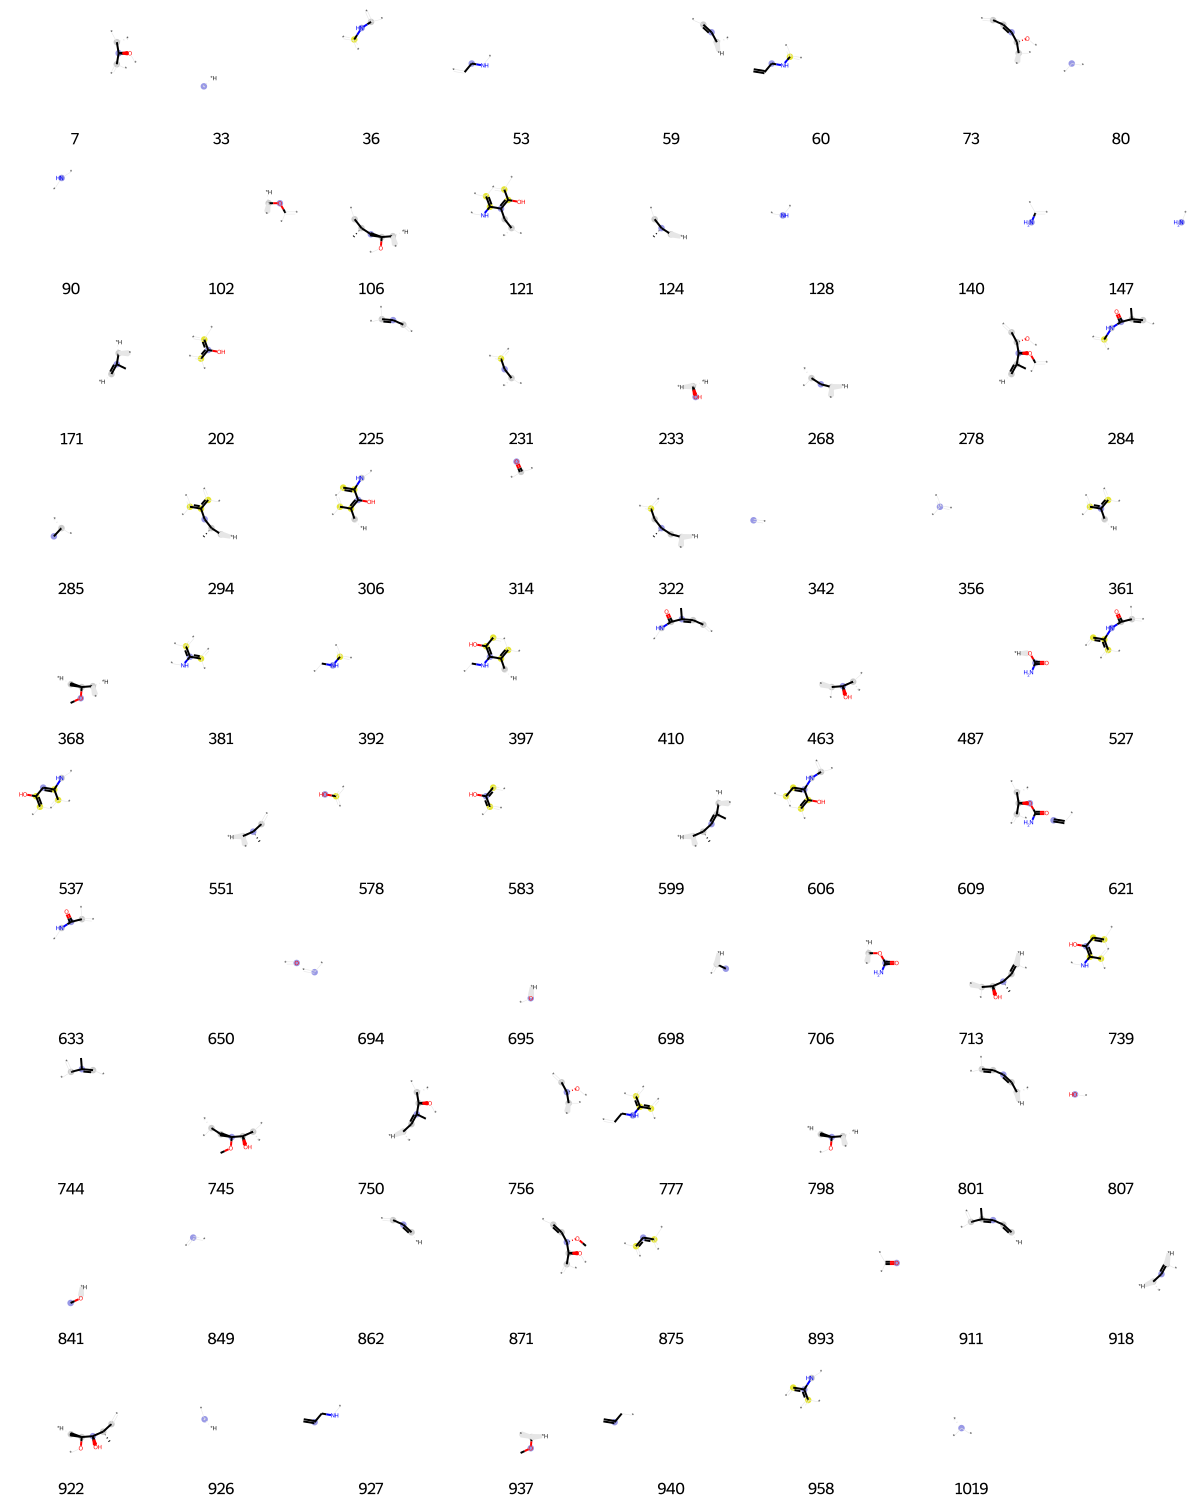

In [396]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])

In [397]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[10,
 32,
 33,
 69,
 80,
 90,
 110,
 112,
 140,
 147,
 230,
 235,
 249,
 294,
 301,
 309,
 314,
 333,
 356,
 370,
 378,
 383,
 400,
 401,
 428,
 430,
 478,
 512,
 540,
 561,
 584,
 621,
 624,
 650,
 684,
 695,
 697,
 726,
 787,
 807,
 831,
 836,
 841,
 842,
 846,
 849,
 875,
 893,
 904,
 946,
 967,
 990,
 1002,
 1015,
 1019]

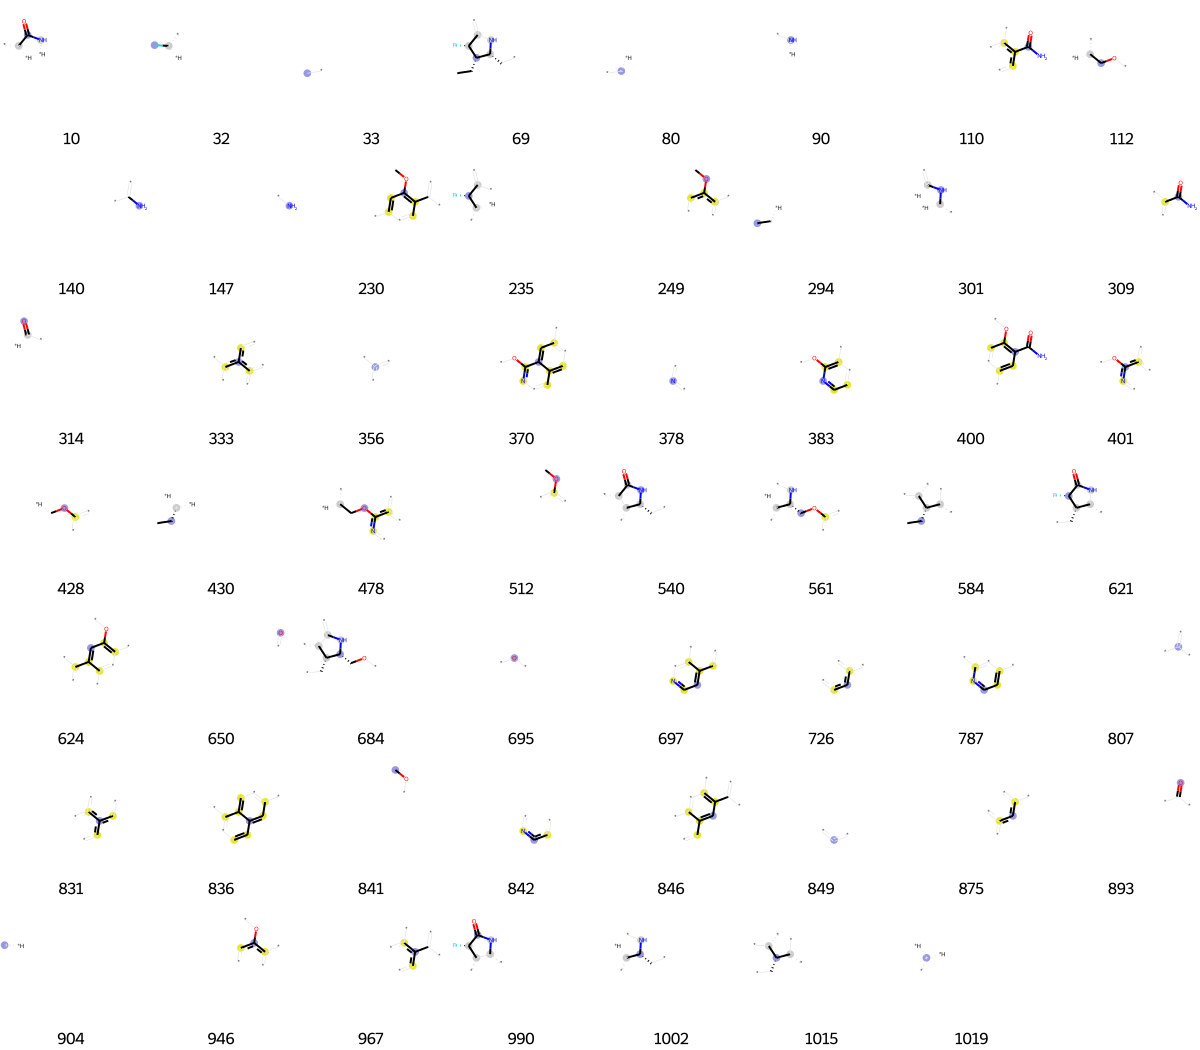

In [398]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [399]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[4,
 33,
 114,
 128,
 191,
 233,
 235,
 246,
 319,
 350,
 356,
 368,
 378,
 410,
 416,
 425,
 429,
 452,
 469,
 502,
 503,
 650,
 661,
 698,
 715,
 726,
 729,
 743,
 799,
 801,
 809,
 828,
 843,
 849,
 853,
 875,
 883,
 896,
 904,
 932,
 935,
 956]

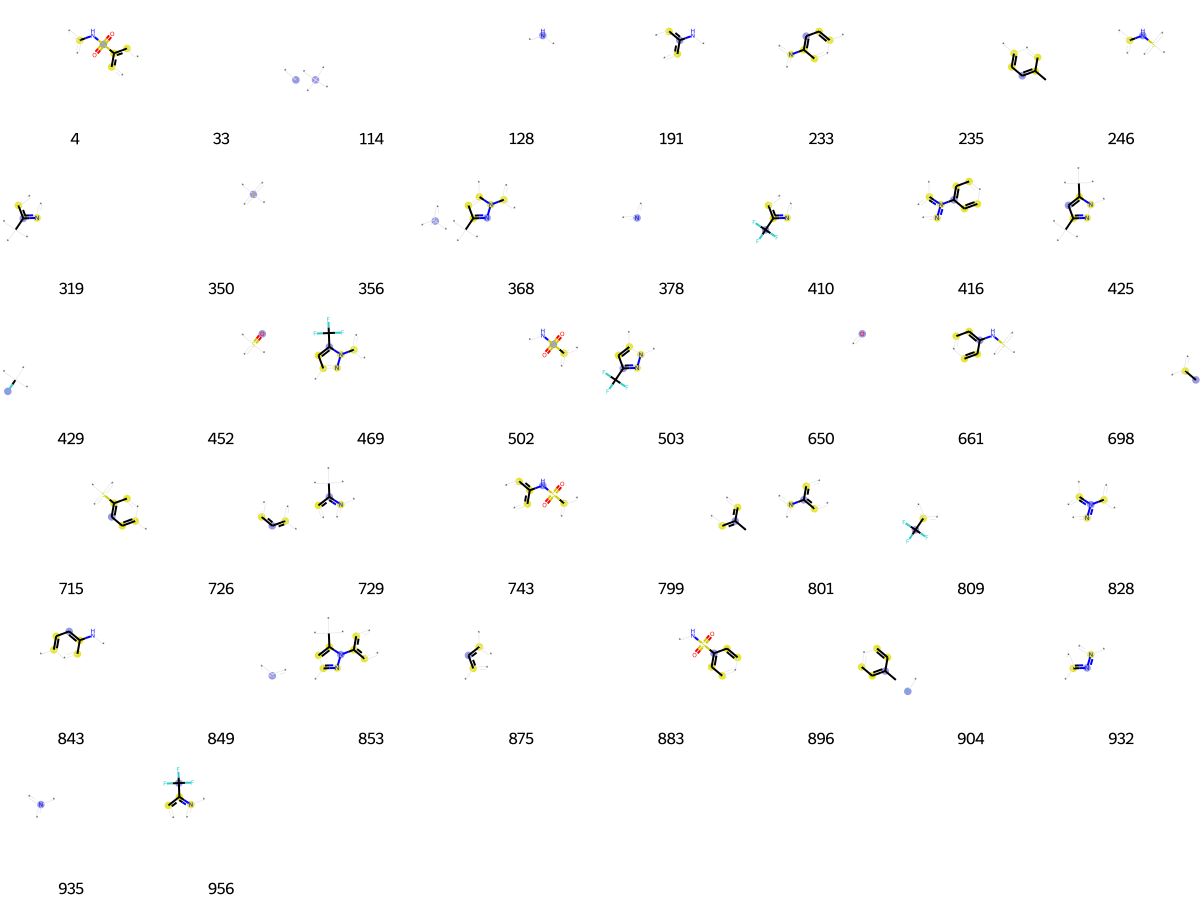

In [400]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [401]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[54,
 121,
 133,
 136,
 157,
 167,
 250,
 289,
 307,
 314,
 352,
 356,
 451,
 457,
 472,
 476,
 501,
 578,
 580,
 583,
 621,
 630,
 650,
 656,
 666,
 678,
 723,
 726,
 732,
 745,
 754,
 759,
 779,
 784,
 807,
 815,
 849,
 865,
 875,
 896,
 920,
 960,
 992,
 1002,
 1014]

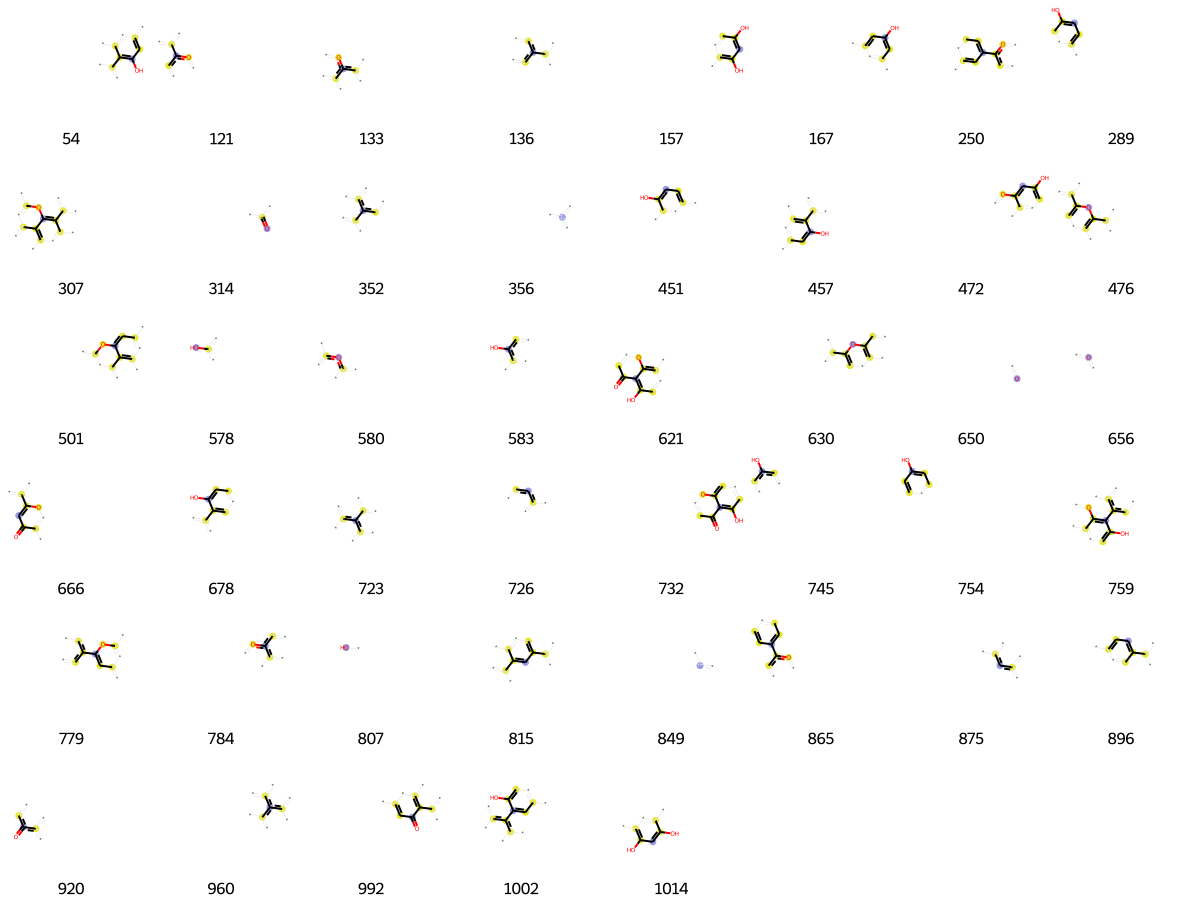

In [402]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [403]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[33,
 80,
 106,
 116,
 139,
 140,
 144,
 147,
 158,
 353,
 544,
 623,
 652,
 653,
 693,
 807,
 881,
 887,
 927,
 942,
 946]

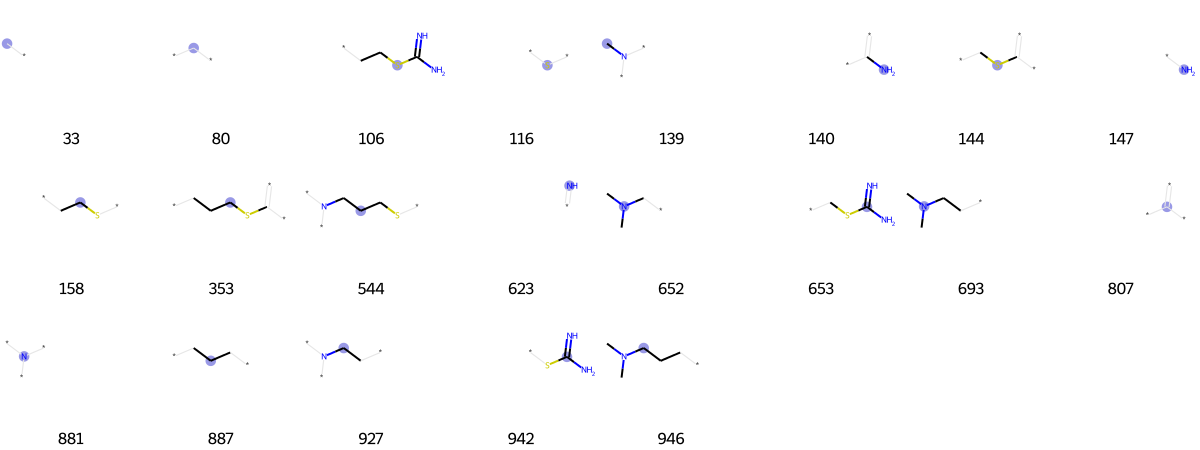

In [404]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [405]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[33,
 42,
 64,
 65,
 77,
 80,
 85,
 92,
 95,
 107,
 175,
 200,
 202,
 277,
 329,
 356,
 360,
 378,
 386,
 389,
 396,
 428,
 600,
 672,
 674,
 693,
 695,
 698,
 726,
 730,
 745,
 790,
 831,
 849,
 868,
 935,
 944,
 945,
 946,
 984,
 1018]

In [407]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[31,
 46,
 117,
 128,
 136,
 140,
 191,
 216,
 240,
 242,
 289,
 356,
 378,
 385,
 491,
 500,
 543,
 552,
 561,
 578,
 659,
 675,
 702,
 726,
 745,
 754,
 807,
 816,
 831,
 843,
 849,
 896,
 947,
 980]

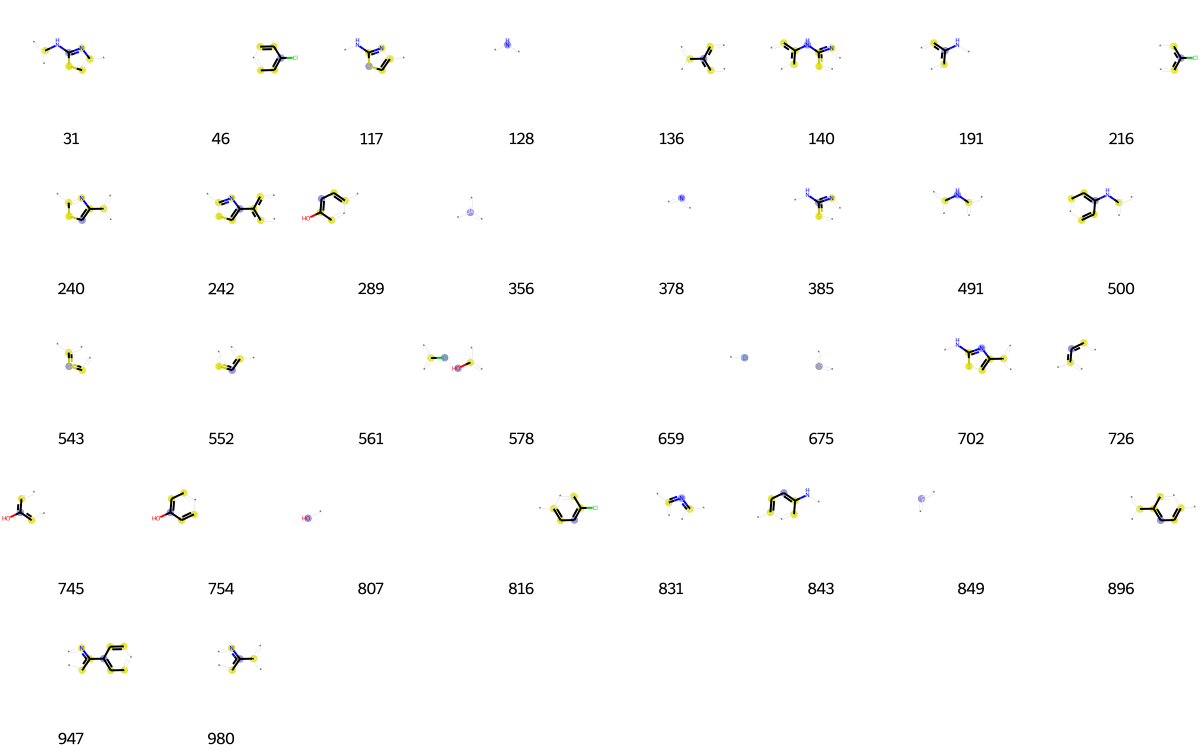

In [408]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [409]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[64,
 73,
 74,
 80,
 83,
 90,
 119,
 131,
 151,
 175,
 271,
 278,
 289,
 343,
 346,
 356,
 378,
 407,
 428,
 448,
 456,
 484,
 527,
 530,
 535,
 694,
 721,
 726,
 741,
 759,
 767,
 784,
 831,
 842,
 849,
 879,
 926,
 935,
 1006]

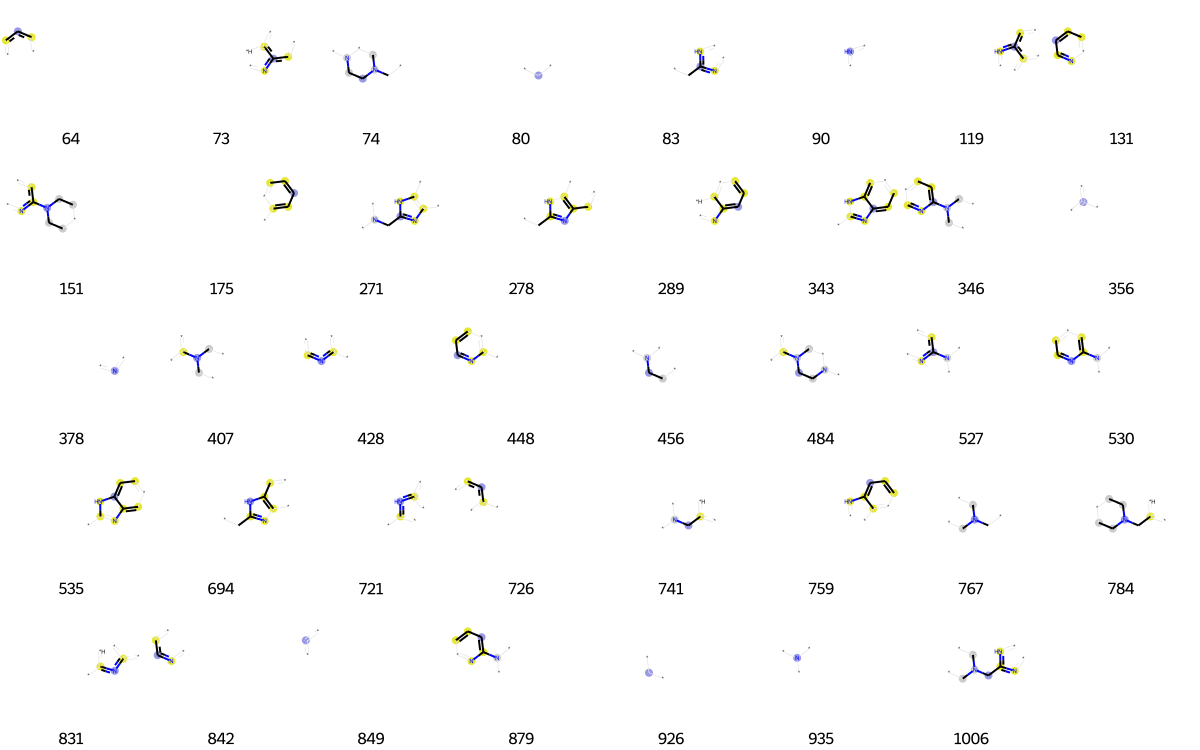

In [410]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [411]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[9,
 33,
 80,
 81,
 90,
 91,
 94,
 97,
 138,
 140,
 147,
 161,
 249,
 284,
 288,
 314,
 322,
 352,
 353,
 356,
 512,
 517,
 545,
 650,
 661,
 668,
 693,
 695,
 710,
 718,
 721,
 726,
 777,
 781,
 802,
 807,
 841,
 849,
 874,
 875,
 893,
 935,
 946,
 948]

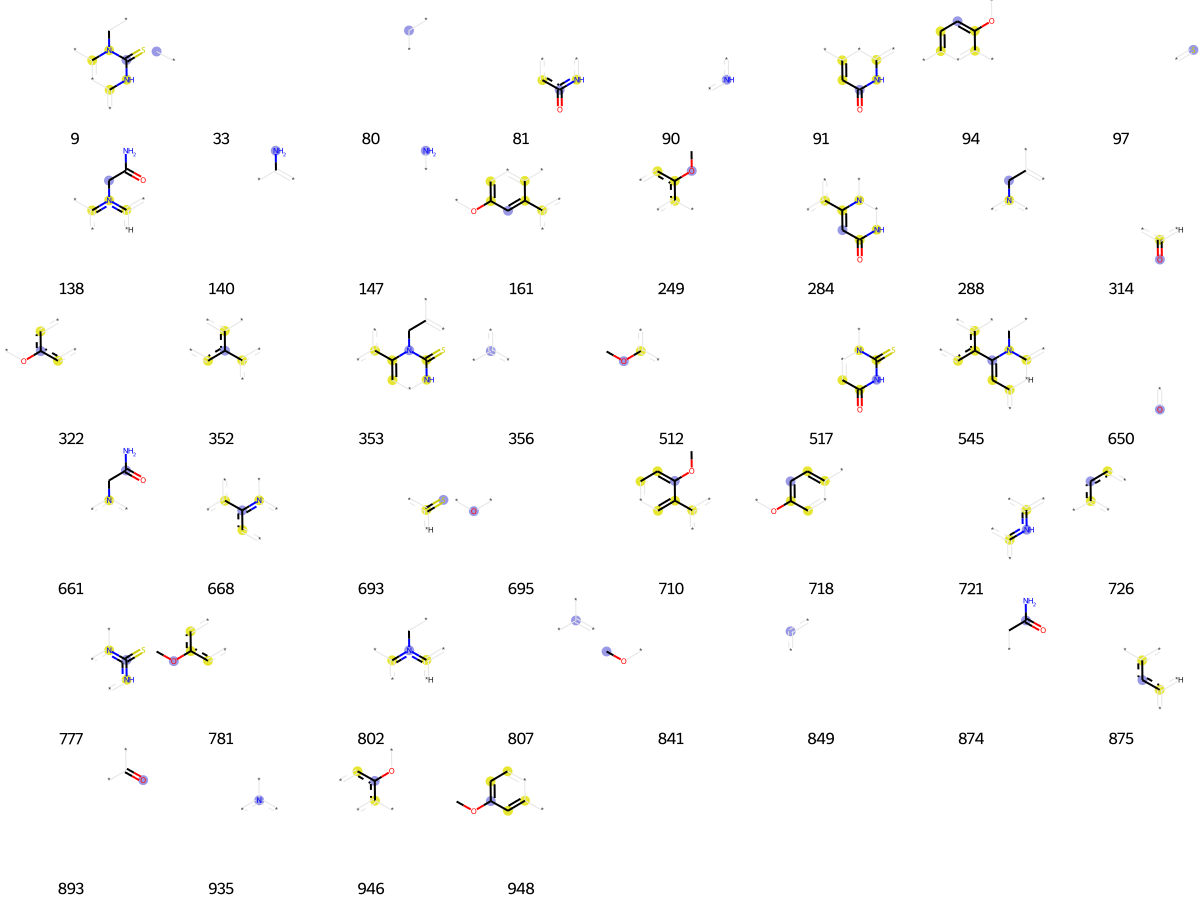

In [412]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [413]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[17,
 33,
 41,
 42,
 64,
 80,
 114,
 128,
 145,
 147,
 159,
 167,
 200,
 209,
 227,
 236,
 324,
 356,
 361,
 366,
 367,
 378,
 379,
 393,
 400,
 428,
 429,
 469,
 474,
 475,
 486,
 498,
 510,
 511,
 546,
 561,
 609,
 621,
 650,
 656,
 658,
 659,
 667,
 673,
 695,
 698,
 708,
 712,
 726,
 730,
 787,
 792,
 807,
 809,
 849,
 875,
 893,
 902,
 904,
 947,
 966,
 973,
 980]

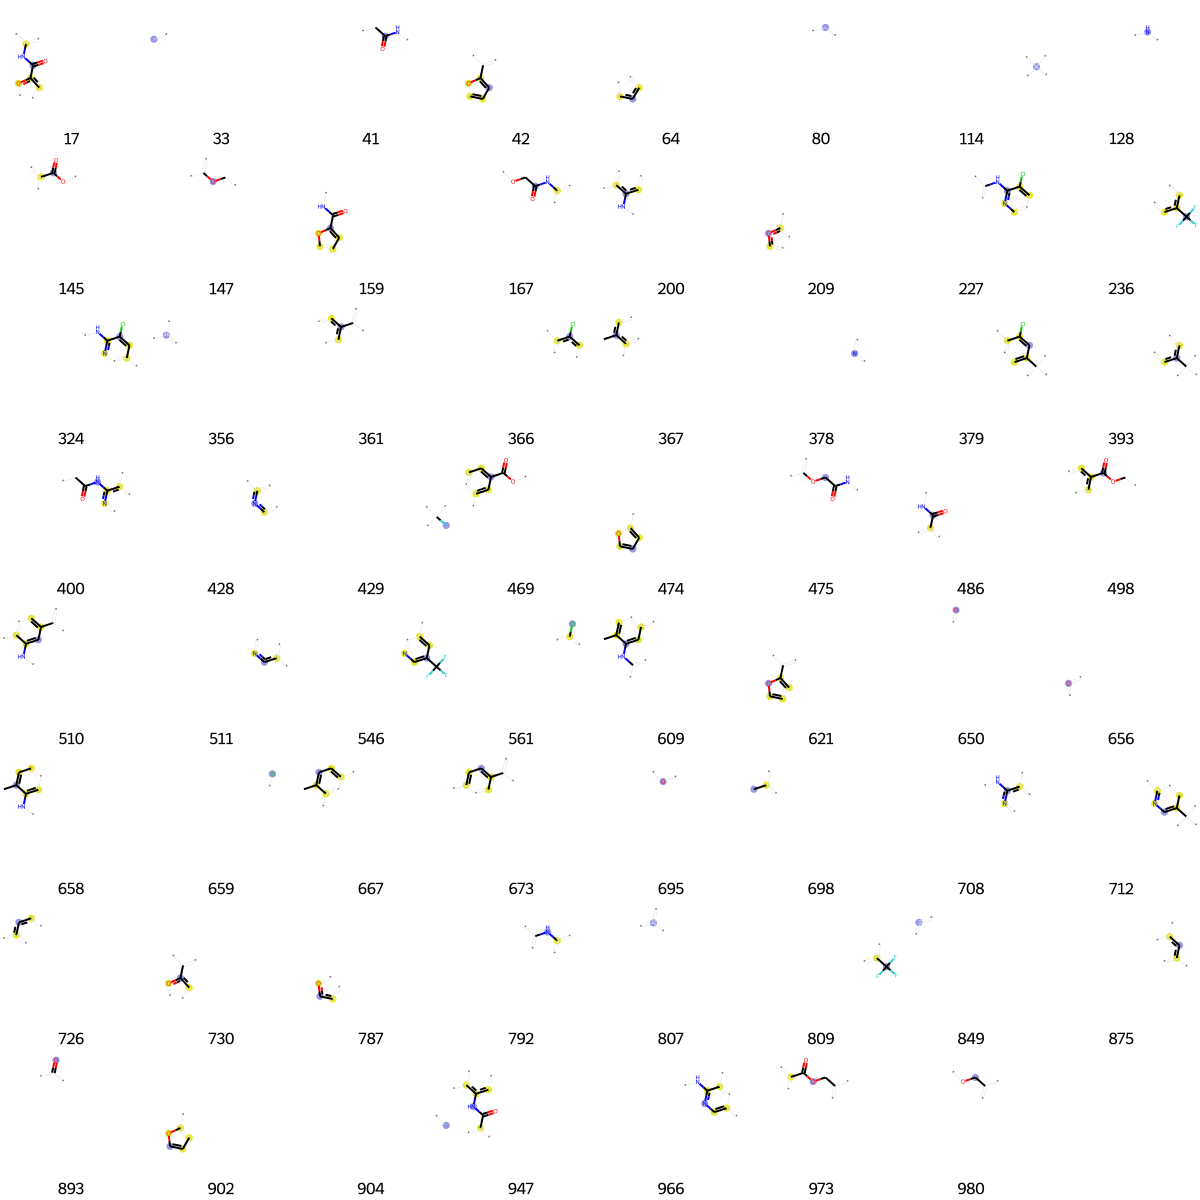

In [414]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [415]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[80, 97, 211, 235, 255, 284, 327, 339, 342, 570, 621, 674, 694, 725, 914, 940]

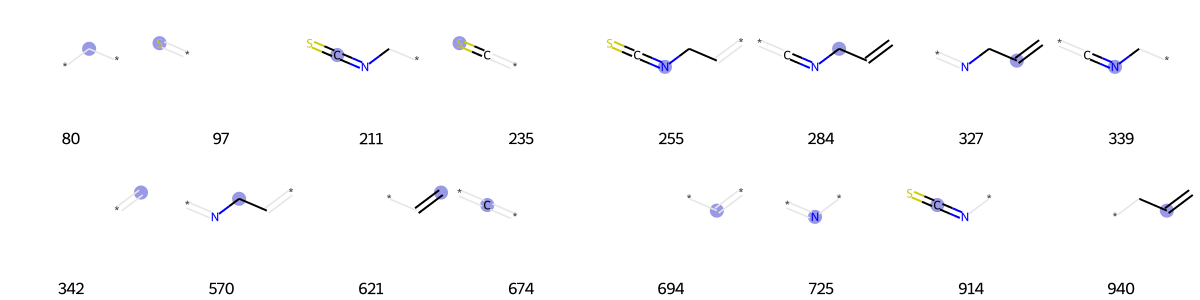

In [416]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [417]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[1,
 15,
 30,
 33,
 64,
 283,
 314,
 341,
 356,
 400,
 405,
 557,
 578,
 583,
 598,
 650,
 726,
 760,
 780,
 807,
 849,
 875,
 906,
 920]

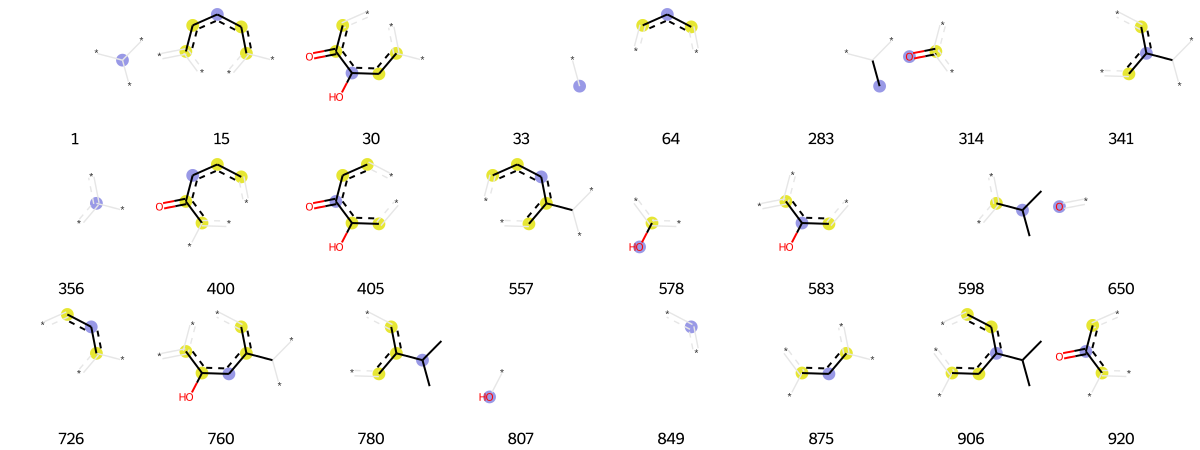

In [418]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [419]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[1,
 4,
 33,
 41,
 79,
 80,
 86,
 90,
 94,
 108,
 117,
 121,
 128,
 140,
 143,
 144,
 147,
 193,
 242,
 283,
 289,
 294,
 301,
 305,
 310,
 319,
 349,
 351,
 354,
 356,
 369,
 378,
 389,
 406,
 409,
 411,
 416,
 428,
 436,
 446,
 456,
 488,
 506,
 507,
 520,
 531,
 572,
 573,
 575,
 578,
 586,
 592,
 594,
 609,
 624,
 625,
 650,
 689,
 695,
 711,
 713,
 720,
 724,
 725,
 726,
 730,
 734,
 736,
 739,
 745,
 749,
 754,
 761,
 798,
 799,
 807,
 820,
 849,
 855,
 857,
 875,
 887,
 893,
 902,
 926,
 931,
 935,
 971,
 978,
 980,
 982,
 992,
 1015,
 1019]

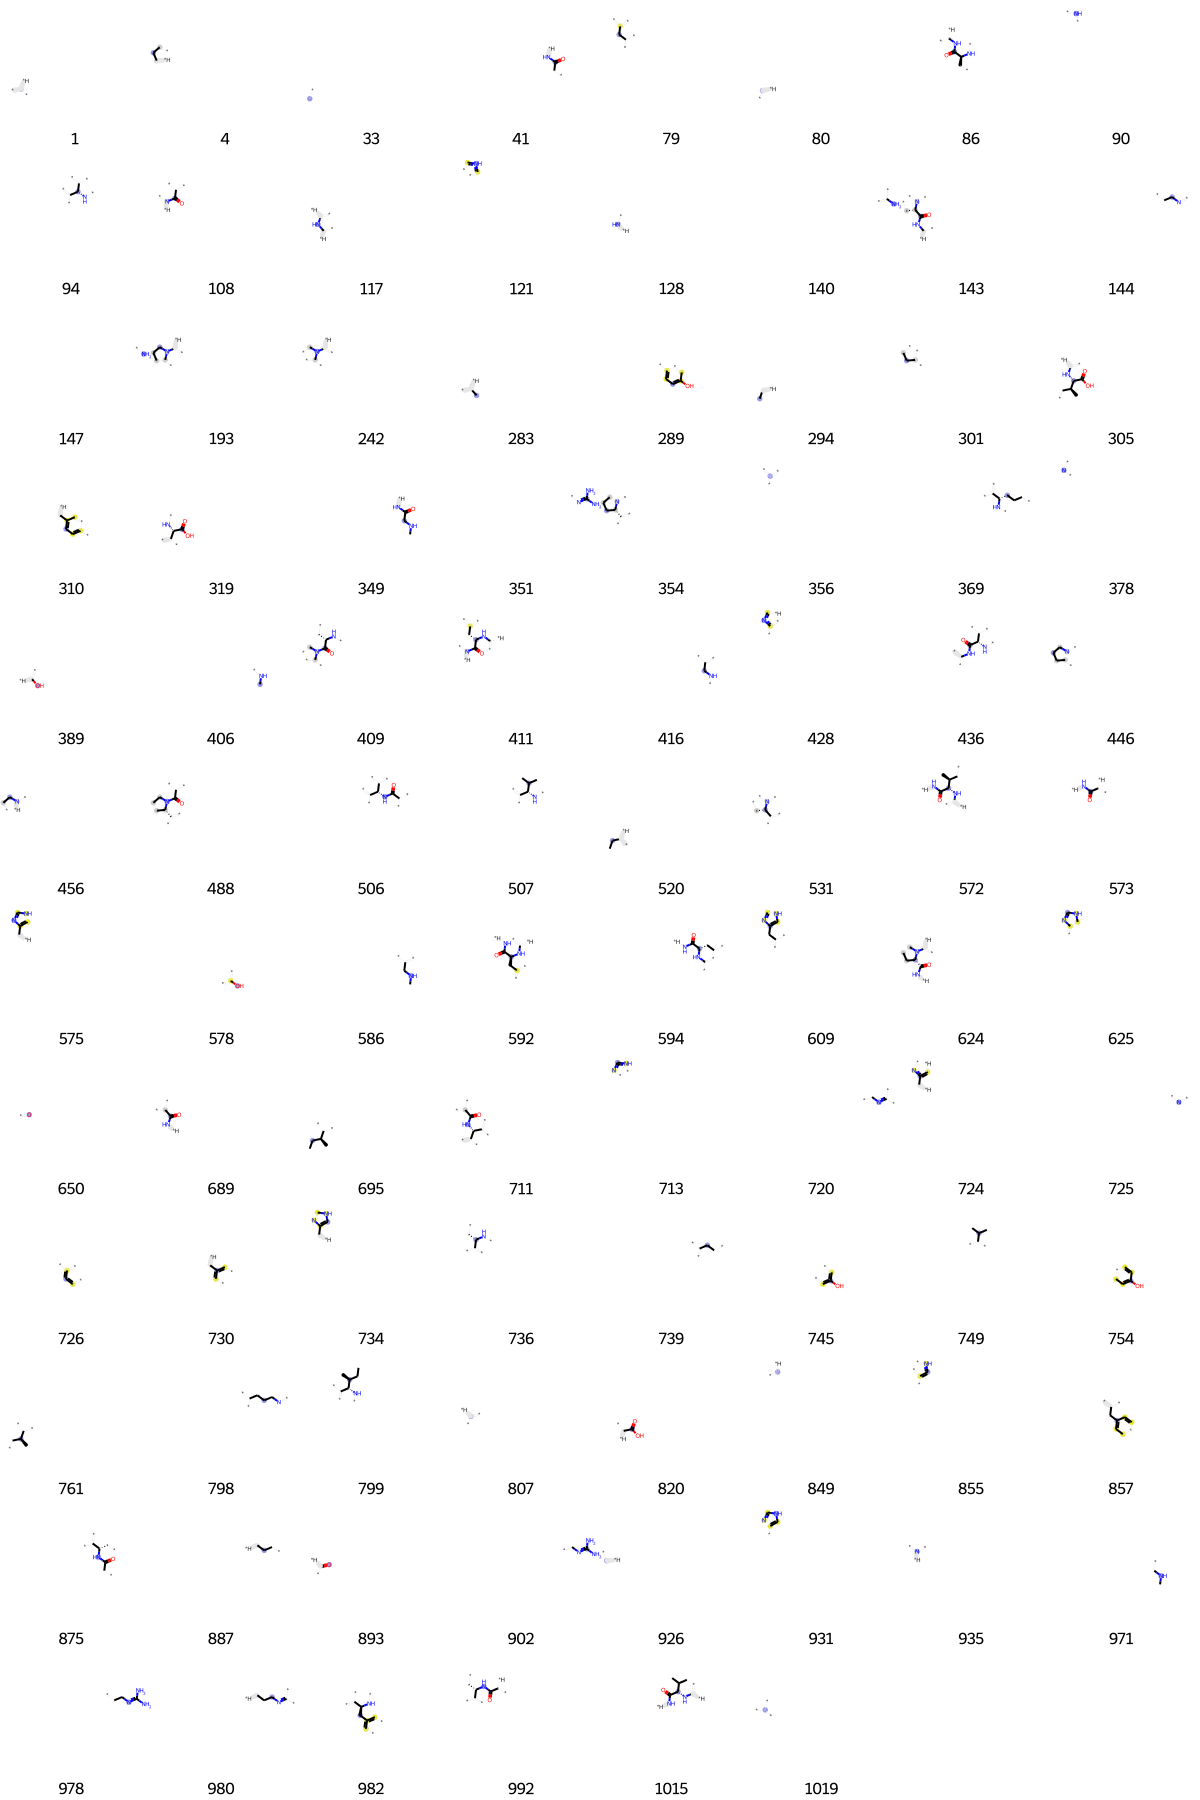

In [420]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [421]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[15,
 33,
 60,
 64,
 95,
 128,
 165,
 187,
 199,
 216,
 223,
 286,
 318,
 319,
 350,
 352,
 356,
 361,
 366,
 381,
 386,
 417,
 451,
 452,
 456,
 486,
 523,
 526,
 561,
 575,
 578,
 583,
 585,
 650,
 656,
 659,
 700,
 705,
 725,
 726,
 727,
 731,
 757,
 800,
 807,
 816,
 849,
 875,
 893,
 926,
 935,
 950,
 961,
 967,
 1017]

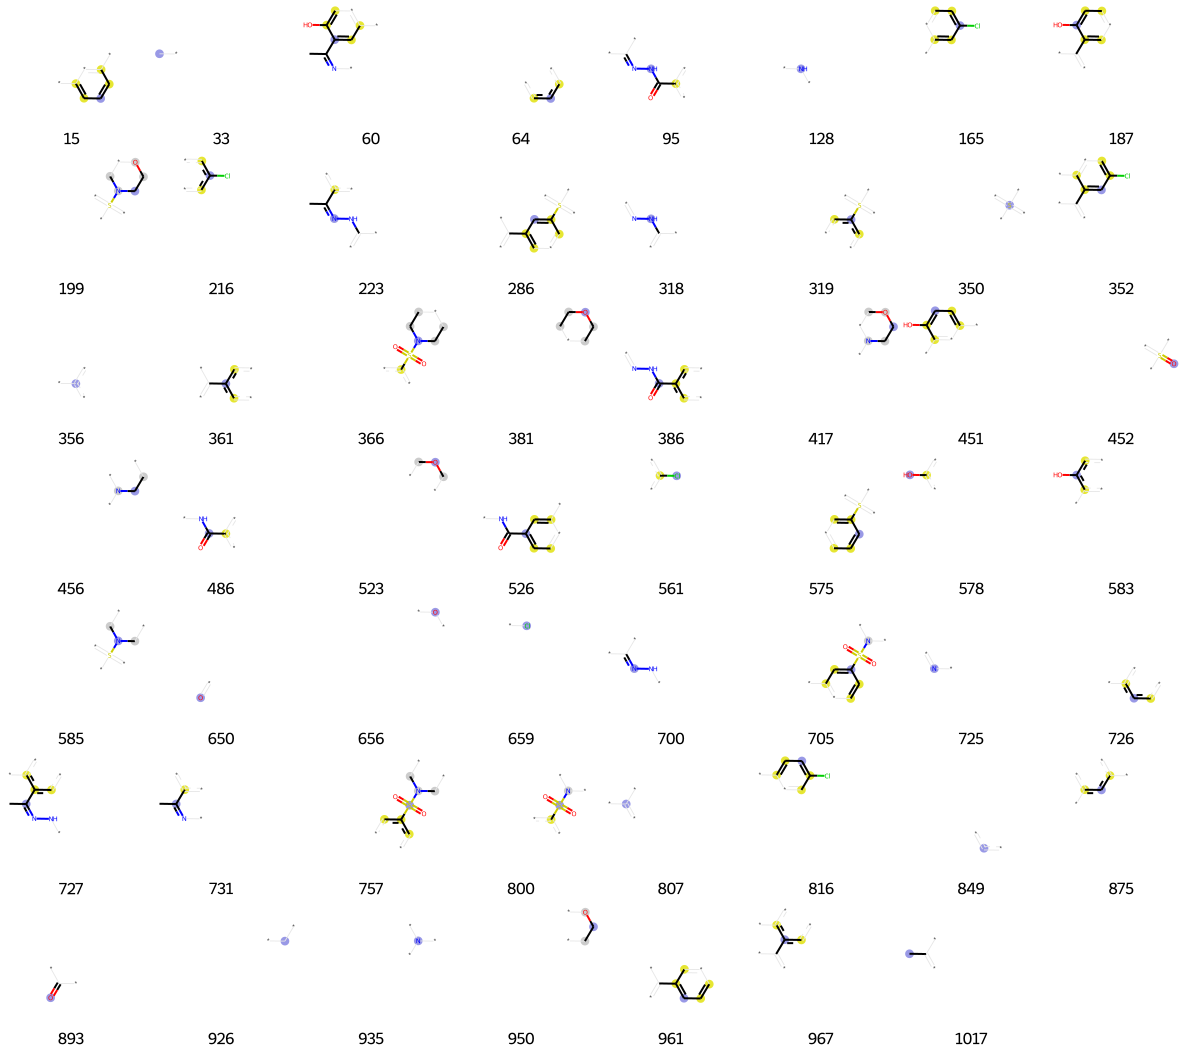

In [422]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [423]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 10,
 24,
 33,
 46,
 78,
 121,
 157,
 197,
 216,
 255,
 271,
 283,
 314,
 323,
 350,
 352,
 356,
 369,
 371,
 378,
 385,
 391,
 401,
 403,
 428,
 448,
 464,
 504,
 511,
 512,
 514,
 530,
 532,
 547,
 561,
 610,
 650,
 659,
 695,
 698,
 726,
 743,
 779,
 790,
 799,
 809,
 816,
 818,
 823,
 831,
 837,
 841,
 849,
 852,
 862,
 873,
 875,
 879,
 898,
 906,
 935,
 988,
 1005,
 1019]

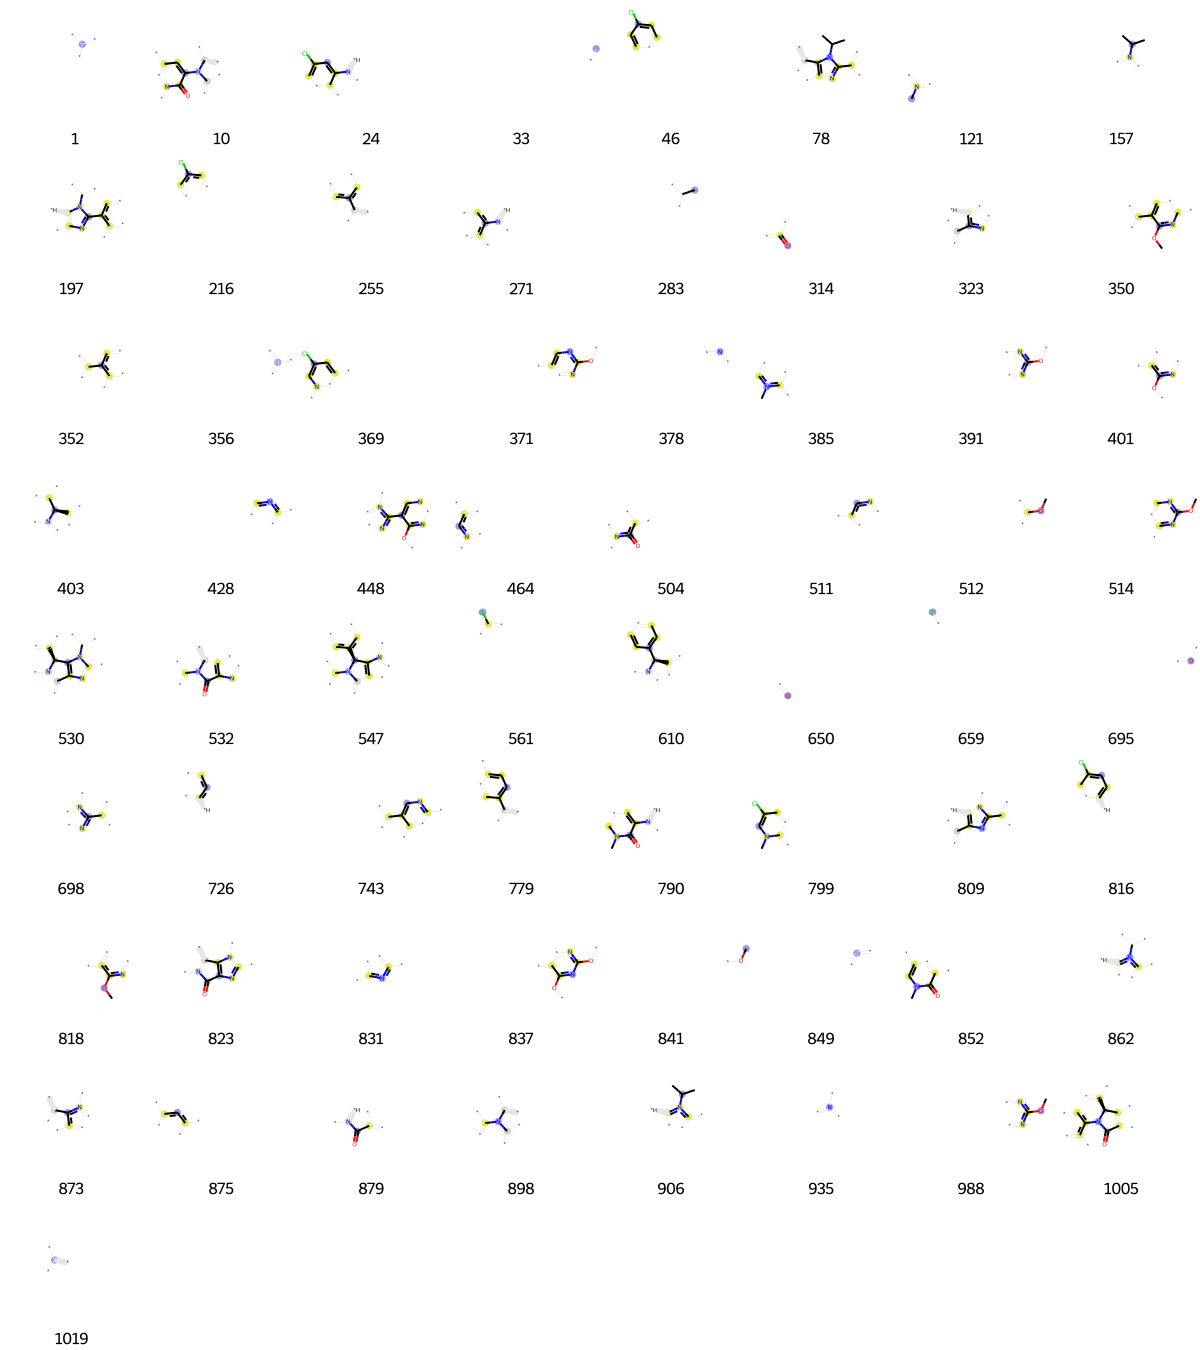

In [424]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [425]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[13,
 32,
 49,
 59,
 80,
 82,
 152,
 210,
 219,
 222,
 233,
 299,
 339,
 356,
 357,
 383,
 433,
 463,
 489,
 492,
 533,
 574,
 610,
 628,
 656,
 695,
 727,
 740,
 799,
 804,
 807,
 820,
 837,
 849,
 869,
 893,
 897,
 915,
 918,
 943,
 953,
 1019]

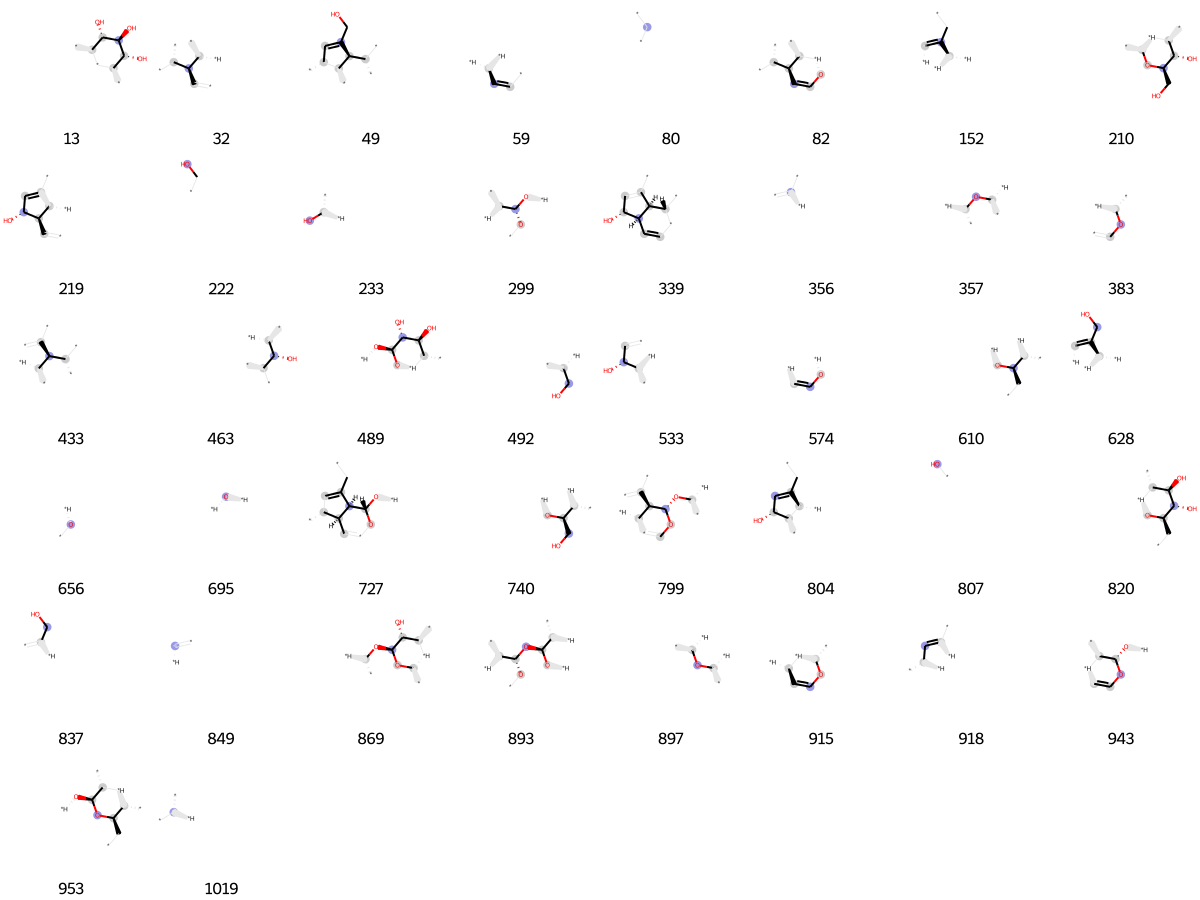

In [426]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [427]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 3,
 15,
 25,
 30,
 33,
 38,
 43,
 58,
 63,
 64,
 75,
 77,
 102,
 117,
 121,
 128,
 140,
 147,
 175,
 180,
 189,
 193,
 199,
 283,
 305,
 312,
 314,
 327,
 352,
 356,
 378,
 389,
 423,
 428,
 430,
 433,
 435,
 448,
 456,
 464,
 486,
 504,
 511,
 522,
 526,
 586,
 603,
 630,
 650,
 670,
 672,
 674,
 691,
 726,
 738,
 757,
 783,
 801,
 807,
 831,
 838,
 842,
 849,
 875,
 893,
 898,
 906,
 926,
 932,
 935,
 960,
 965,
 969]

In [429]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[15,
 24,
 25,
 33,
 62,
 64,
 73,
 136,
 140,
 162,
 168,
 175,
 322,
 356,
 361,
 378,
 383,
 389,
 511,
 512,
 571,
 597,
 607,
 637,
 675,
 695,
 709,
 718,
 726,
 736,
 781,
 831,
 841,
 849,
 875,
 896,
 907]

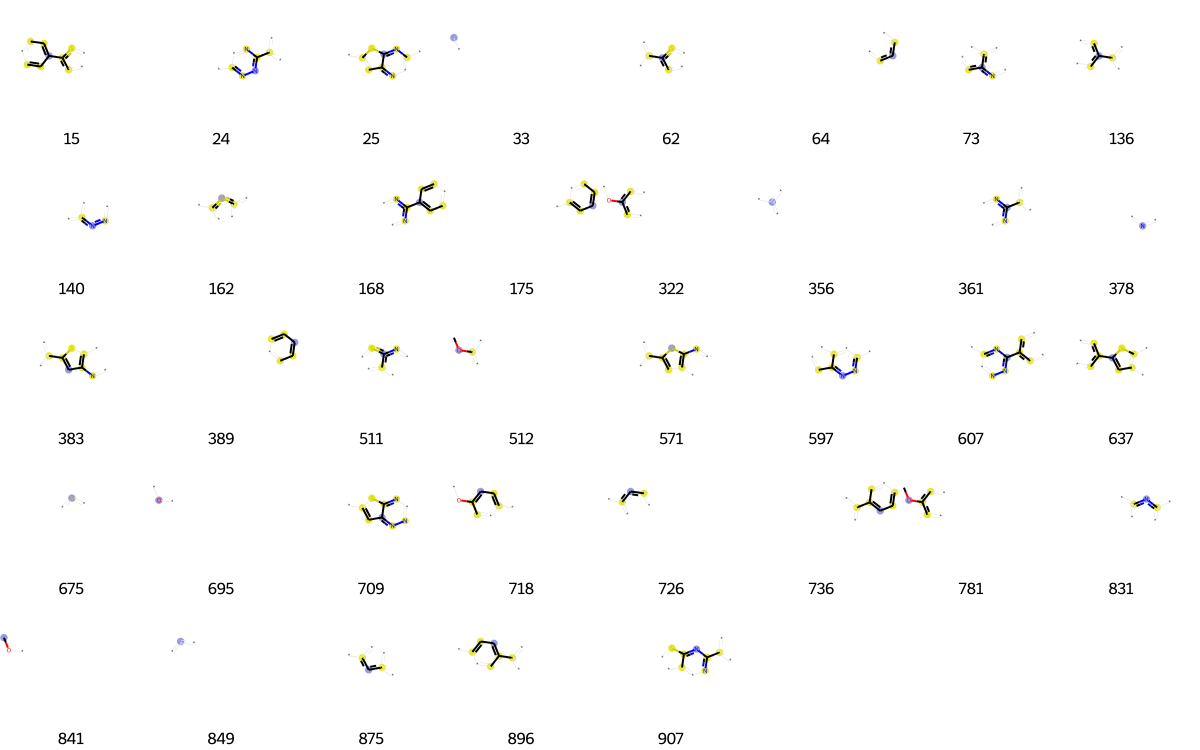

In [430]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [431]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[1,
 33,
 73,
 83,
 140,
 177,
 202,
 227,
 233,
 237,
 276,
 323,
 333,
 351,
 352,
 356,
 366,
 378,
 381,
 407,
 414,
 417,
 423,
 428,
 456,
 489,
 494,
 496,
 501,
 512,
 523,
 530,
 541,
 546,
 553,
 561,
 629,
 632,
 656,
 659,
 673,
 687,
 695,
 699,
 709,
 726,
 786,
 801,
 807,
 816,
 828,
 841,
 849,
 875,
 904,
 924,
 925,
 926,
 935,
 937,
 950,
 997,
 1014]

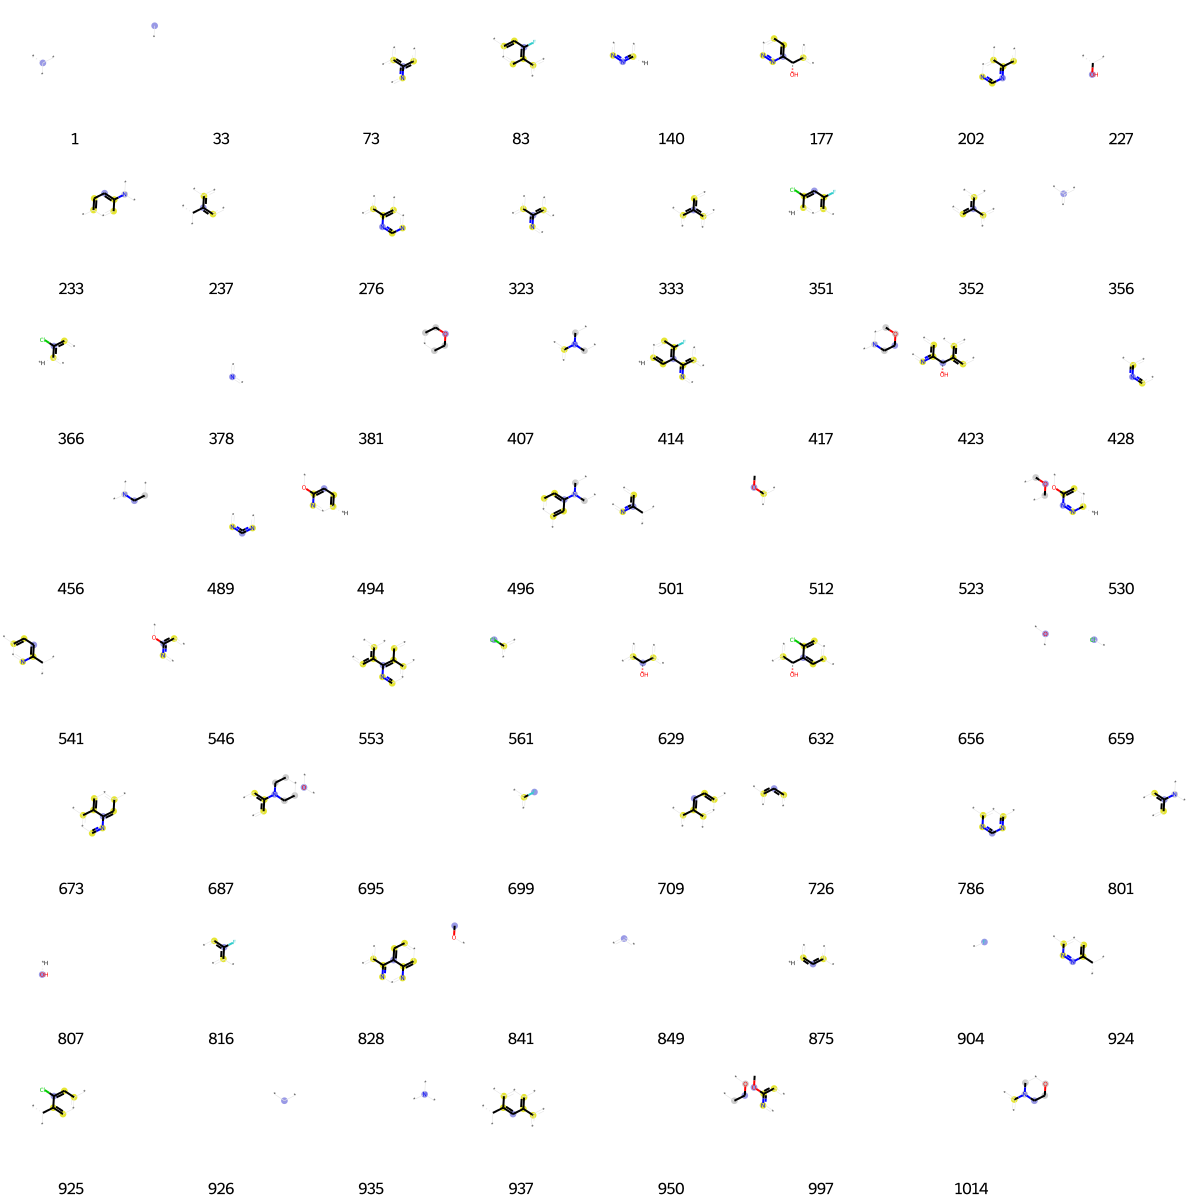

In [432]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [433]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 33,
 36,
 71,
 80,
 84,
 90,
 114,
 123,
 128,
 136,
 138,
 172,
 184,
 191,
 212,
 214,
 235,
 255,
 256,
 258,
 283,
 288,
 302,
 310,
 314,
 329,
 345,
 351,
 356,
 357,
 386,
 406,
 429,
 495,
 507,
 521,
 527,
 582,
 583,
 588,
 608,
 625,
 646,
 647,
 650,
 656,
 667,
 688,
 699,
 714,
 726,
 730,
 734,
 792,
 807,
 821,
 837,
 843,
 849,
 875,
 881,
 893,
 904,
 926,
 935,
 956,
 965,
 966]

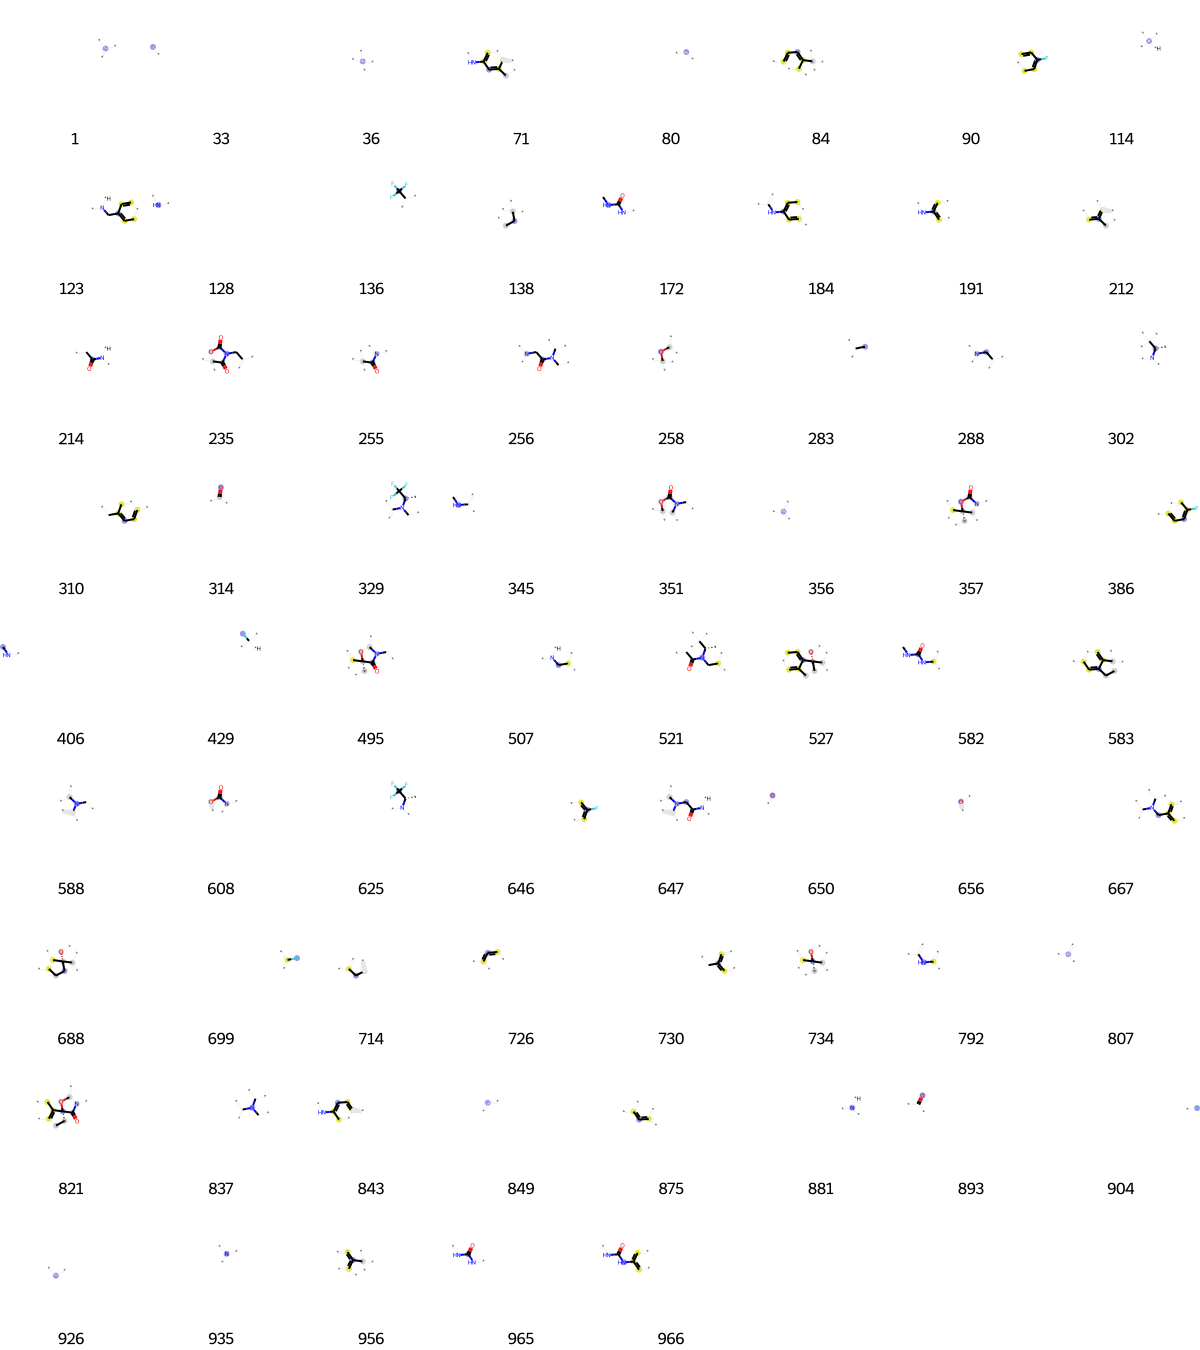

In [434]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [435]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[7,
 16,
 19,
 33,
 36,
 64,
 136,
 138,
 163,
 182,
 186,
 231,
 233,
 250,
 257,
 260,
 301,
 302,
 350,
 356,
 377,
 378,
 437,
 439,
 504,
 511,
 519,
 529,
 562,
 579,
 590,
 598,
 622,
 694,
 696,
 726,
 736,
 757,
 775,
 807,
 842,
 849,
 850,
 860,
 926,
 987,
 1019]

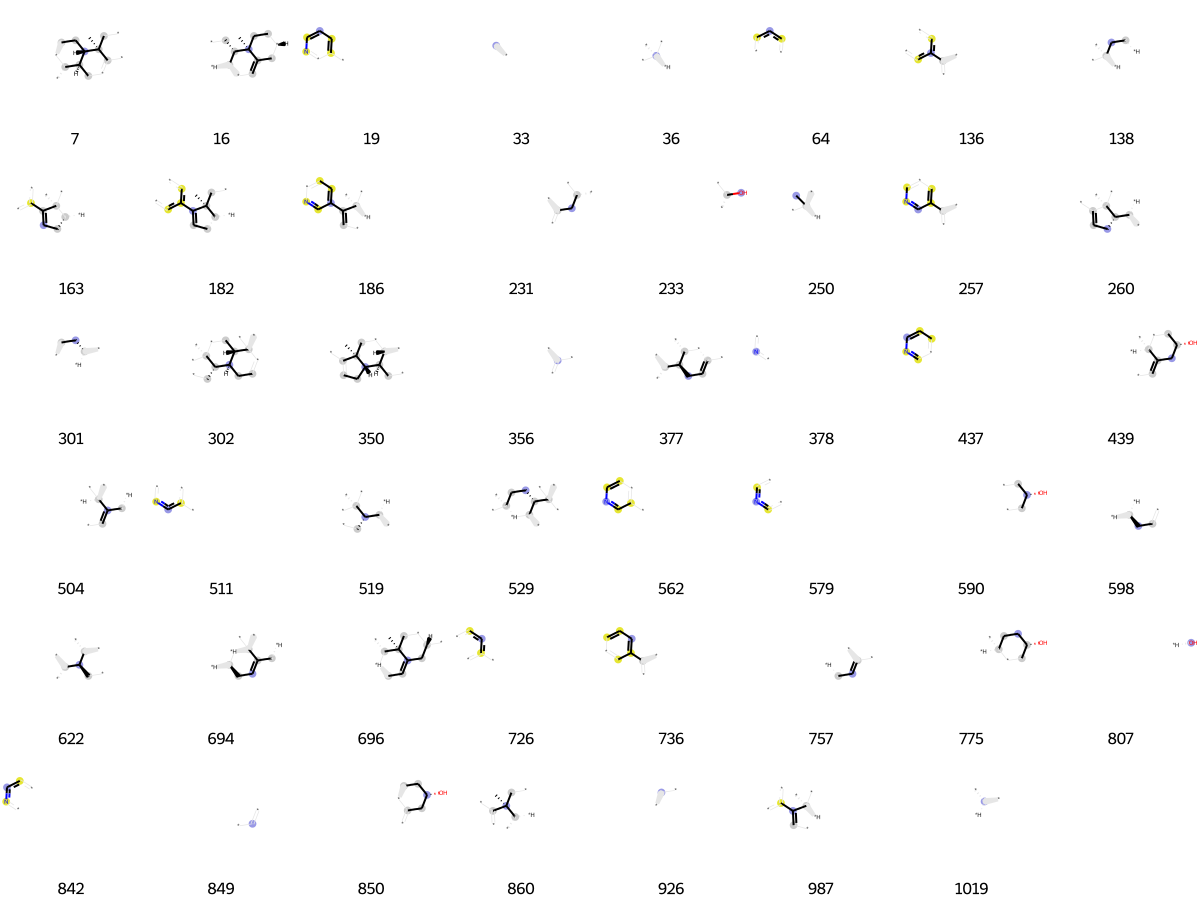

In [436]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [437]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[33,
 46,
 80,
 109,
 128,
 197,
 216,
 294,
 307,
 319,
 331,
 350,
 356,
 425,
 452,
 454,
 502,
 561,
 582,
 650,
 659,
 667,
 715,
 726,
 794,
 807,
 814,
 816,
 849,
 883,
 893,
 965]

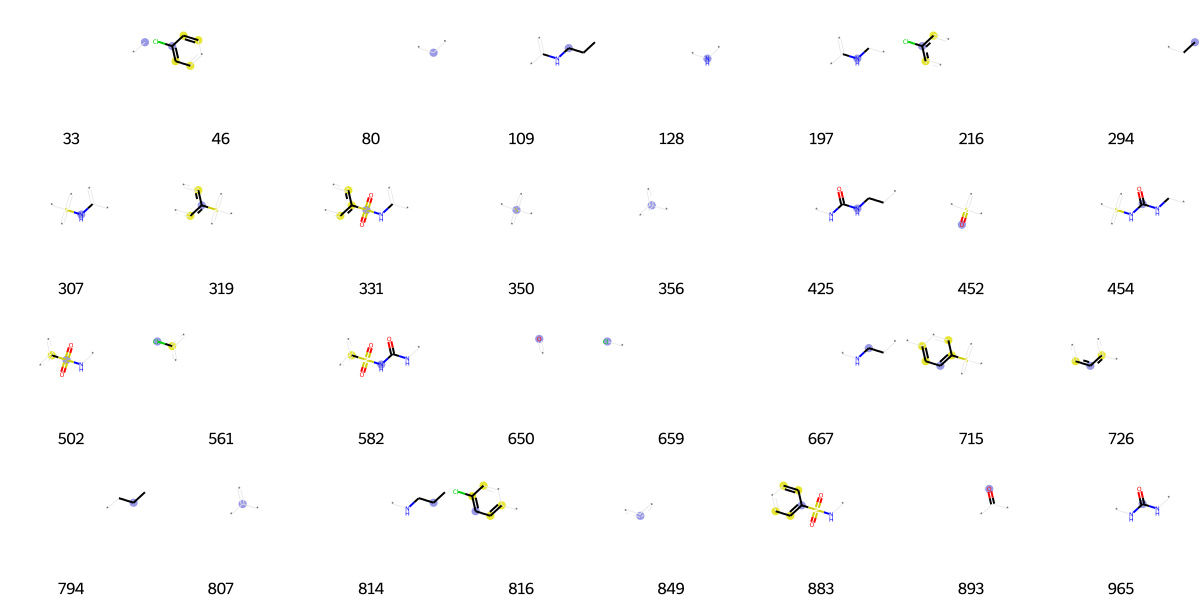

In [438]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [439]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[15,
 17,
 33,
 64,
 73,
 80,
 90,
 123,
 127,
 136,
 139,
 210,
 240,
 248,
 289,
 305,
 310,
 314,
 329,
 352,
 356,
 378,
 416,
 456,
 472,
 476,
 490,
 507,
 524,
 633,
 650,
 652,
 667,
 698,
 726,
 730,
 740,
 763,
 831,
 842,
 849,
 881,
 896,
 926,
 935,
 980,
 984]

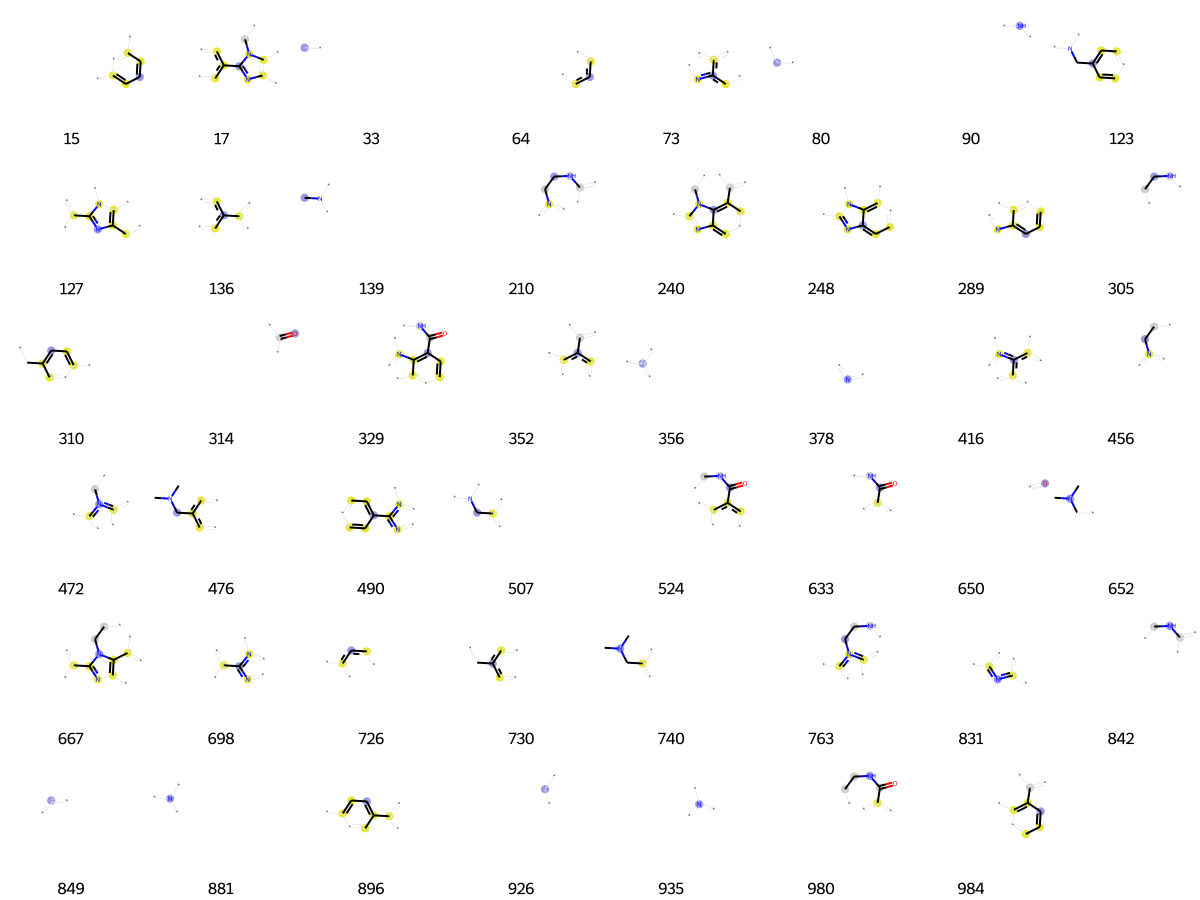

In [440]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [441]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[33,
 80,
 90,
 119,
 128,
 197,
 218,
 294,
 314,
 337,
 349,
 356,
 420,
 445,
 464,
 542,
 578,
 591,
 592,
 650,
 667,
 699,
 721,
 745,
 750,
 758,
 772,
 794,
 807,
 816,
 846,
 849,
 852,
 887,
 893,
 904,
 917,
 935]

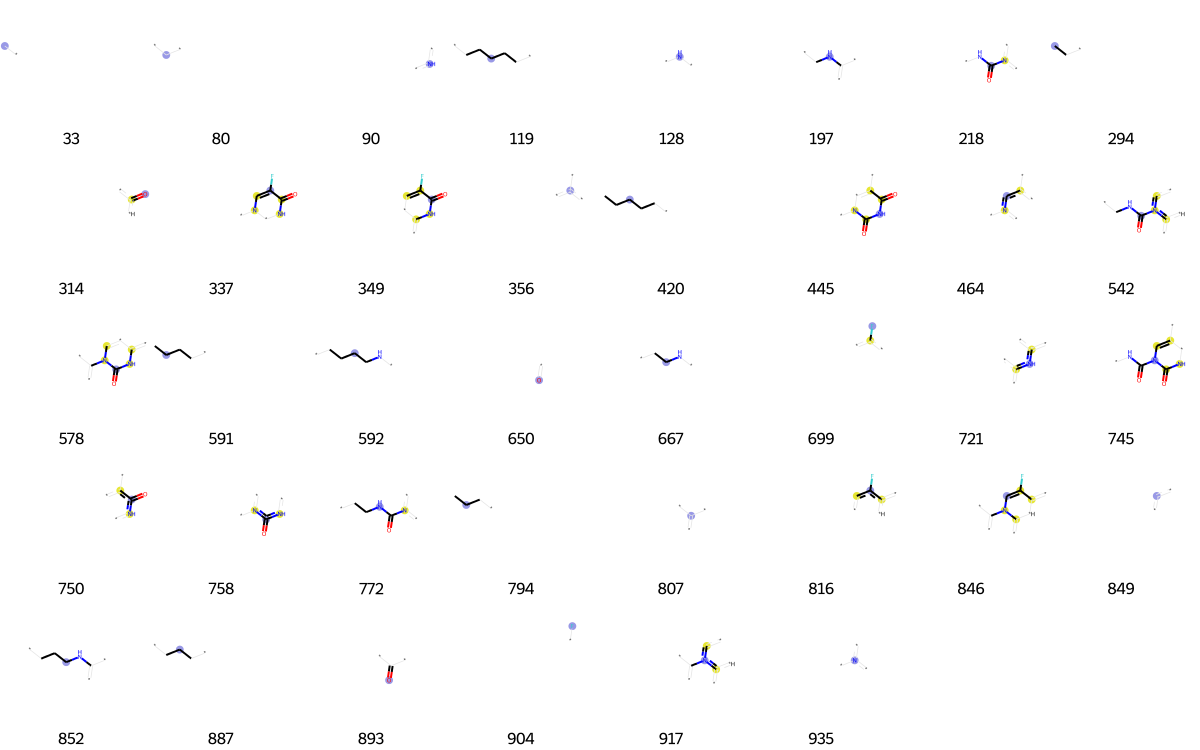

In [442]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [446]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1,
 75,
 80,
 82,
 118,
 147,
 172,
 192,
 295,
 389,
 403,
 486,
 650,
 692,
 695,
 786,
 795,
 807,
 814,
 820,
 825,
 893]

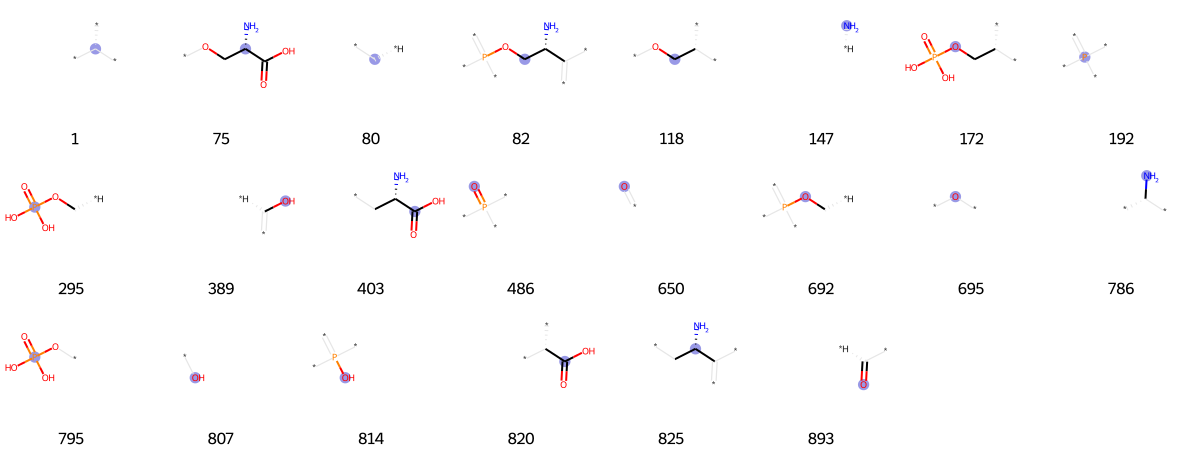

In [447]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [448]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 4,
 21,
 33,
 42,
 51,
 64,
 80,
 97,
 108,
 128,
 139,
 145,
 147,
 153,
 175,
 214,
 219,
 255,
 268,
 276,
 283,
 294,
 301,
 356,
 370,
 389,
 407,
 428,
 476,
 500,
 531,
 559,
 573,
 585,
 650,
 665,
 695,
 698,
 726,
 730,
 736,
 739,
 794,
 807,
 808,
 849,
 890,
 893,
 926,
 935,
 979,
 989,
 1019]

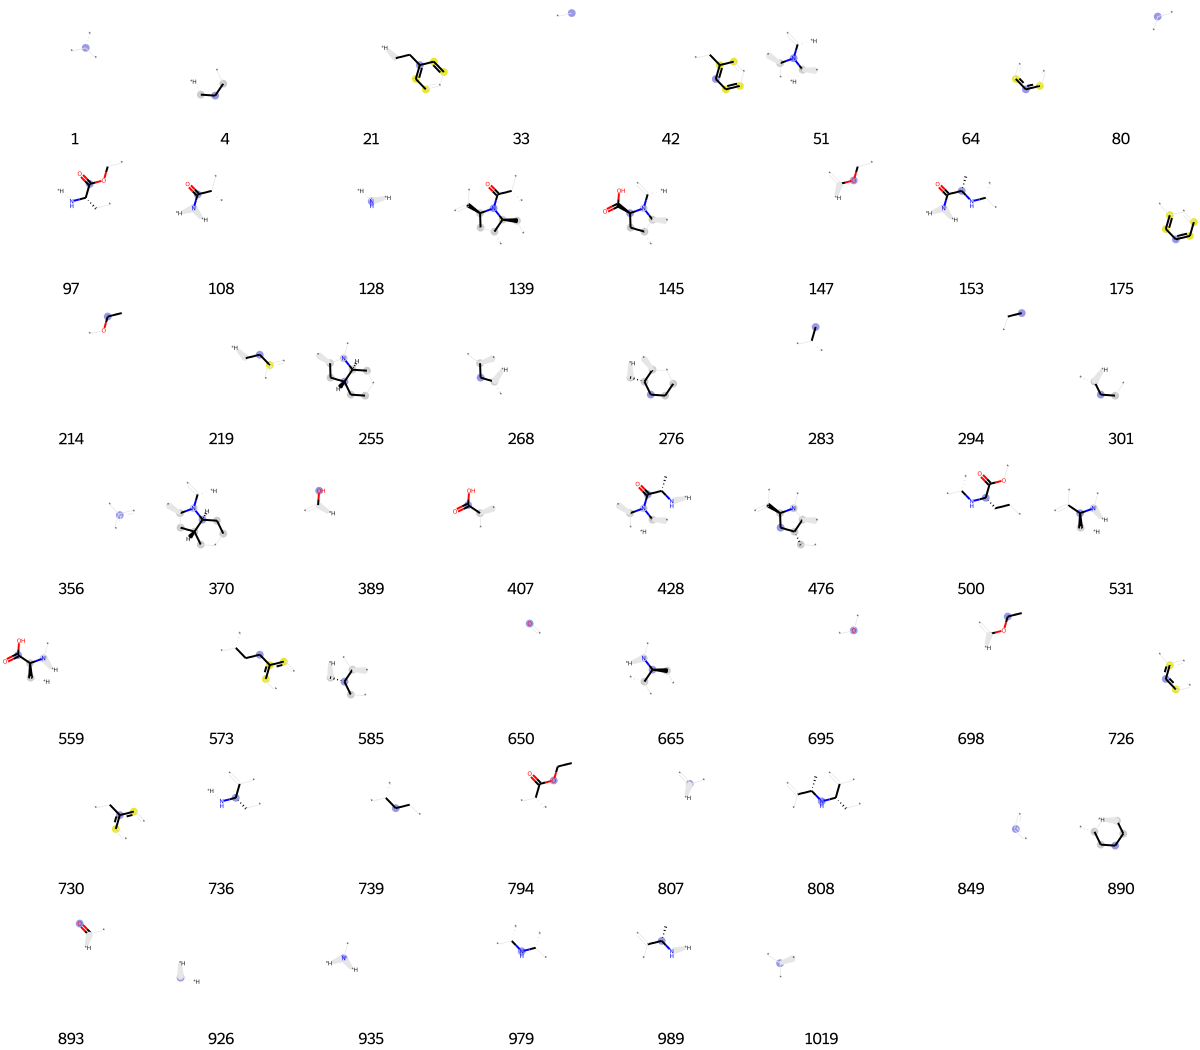

In [449]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [450]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[19,
 64,
 202,
 322,
 333,
 356,
 378,
 428,
 448,
 449,
 549,
 578,
 607,
 700,
 726,
 728,
 786,
 787,
 807,
 833,
 842,
 849,
 875,
 885,
 915,
 949]

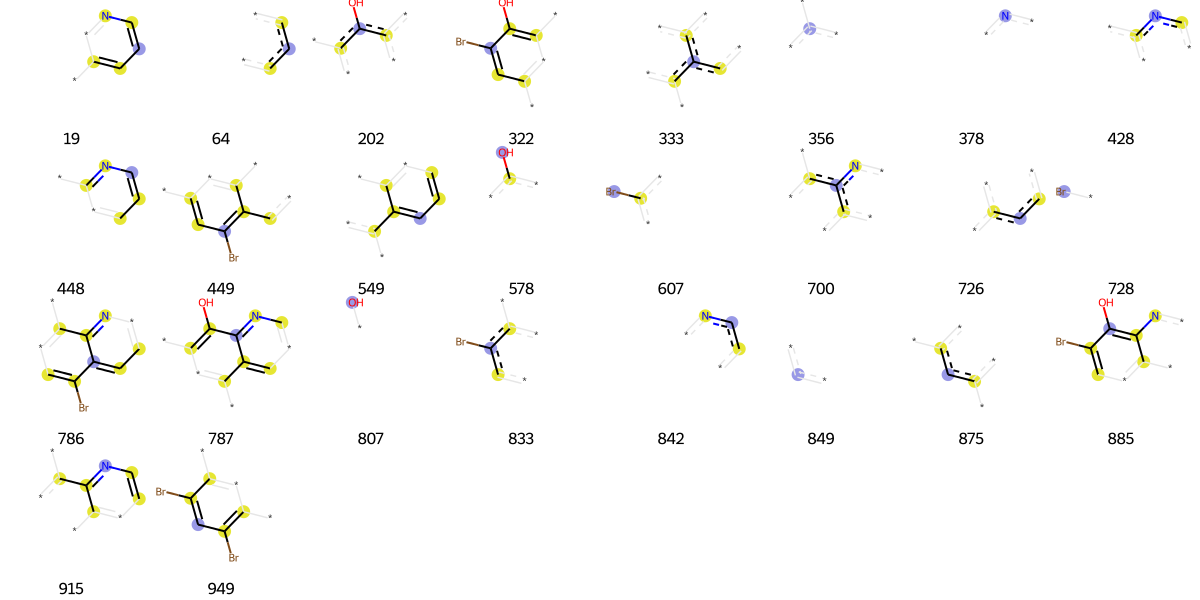

In [451]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [452]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[3,
 12,
 33,
 64,
 80,
 128,
 138,
 175,
 301,
 356,
 371,
 406,
 424,
 444,
 547,
 667,
 718,
 726,
 780,
 793,
 832,
 849,
 887,
 896,
 931,
 971,
 984,
 1019]

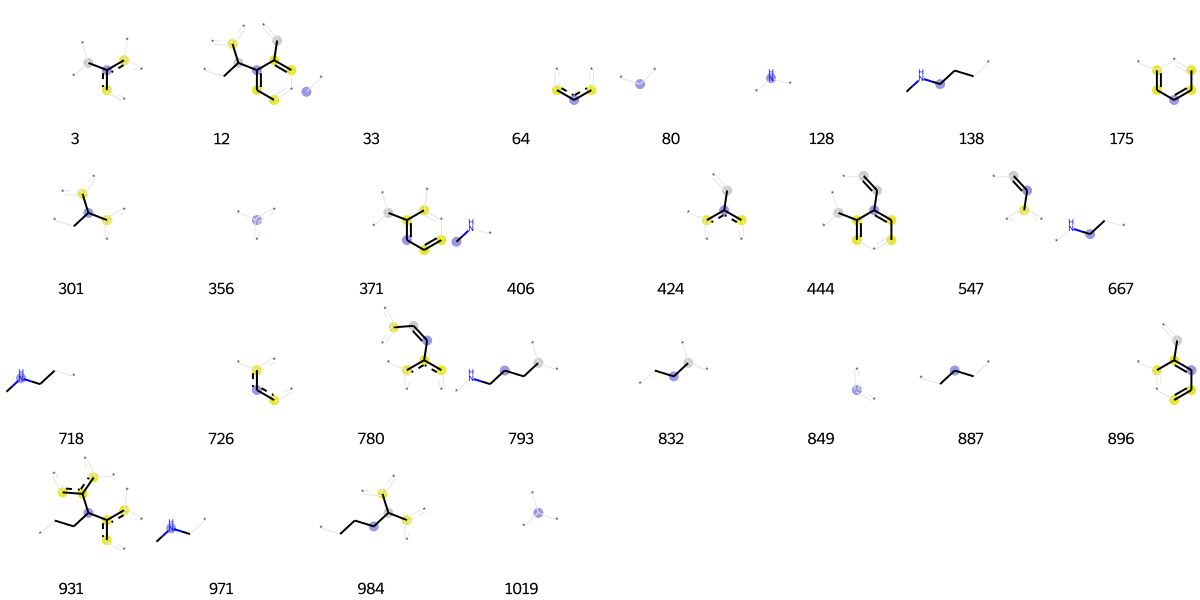

In [453]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [454]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[1,
 33,
 51,
 64,
 80,
 118,
 140,
 147,
 175,
 178,
 227,
 249,
 329,
 356,
 386,
 411,
 428,
 487,
 512,
 523,
 650,
 658,
 695,
 726,
 807,
 841,
 849,
 874,
 893,
 946,
 1014]

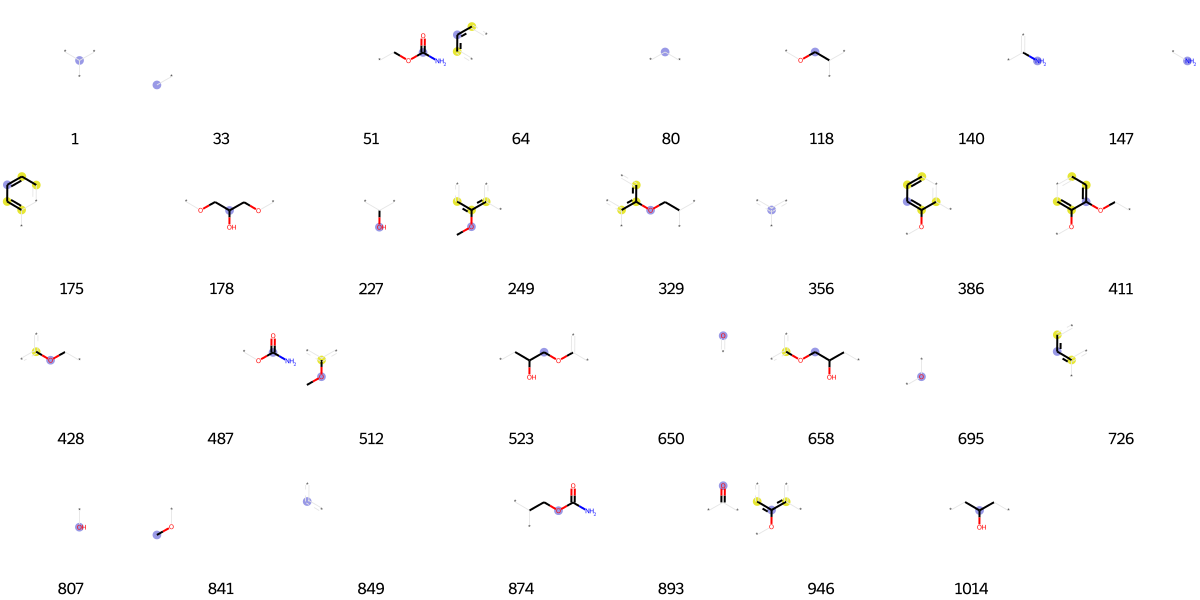

In [455]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [456]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[33,
 34,
 53,
 64,
 73,
 90,
 102,
 109,
 112,
 119,
 121,
 128,
 144,
 175,
 191,
 214,
 242,
 268,
 288,
 289,
 301,
 305,
 339,
 343,
 356,
 360,
 368,
 378,
 387,
 410,
 438,
 456,
 486,
 535,
 610,
 650,
 670,
 674,
 681,
 721,
 726,
 759,
 790,
 792,
 807,
 831,
 843,
 847,
 849,
 893,
 926,
 930,
 935,
 965,
 966,
 1018,
 1019]

In [457]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [458]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[25,
 33,
 54,
 84,
 93,
 116,
 126,
 133,
 139,
 171,
 201,
 202,
 203,
 209,
 250,
 259,
 303,
 350,
 356,
 367,
 378,
 392,
 428,
 452,
 464,
 466,
 511,
 546,
 547,
 607,
 650,
 662,
 667,
 694,
 698,
 715,
 725,
 726,
 728,
 753,
 769,
 785,
 790,
 815,
 819,
 838,
 849,
 864,
 875,
 877,
 881,
 909,
 916,
 935,
 939,
 945]

In [460]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[1,
 15,
 33,
 64,
 79,
 80,
 117,
 128,
 136,
 249,
 310,
 356,
 366,
 386,
 389,
 411,
 419,
 486,
 495,
 512,
 558,
 561,
 586,
 600,
 624,
 650,
 659,
 695,
 723,
 726,
 730,
 736,
 807,
 820,
 841,
 849,
 851,
 857,
 893,
 896,
 946,
 965,
 974,
 982]

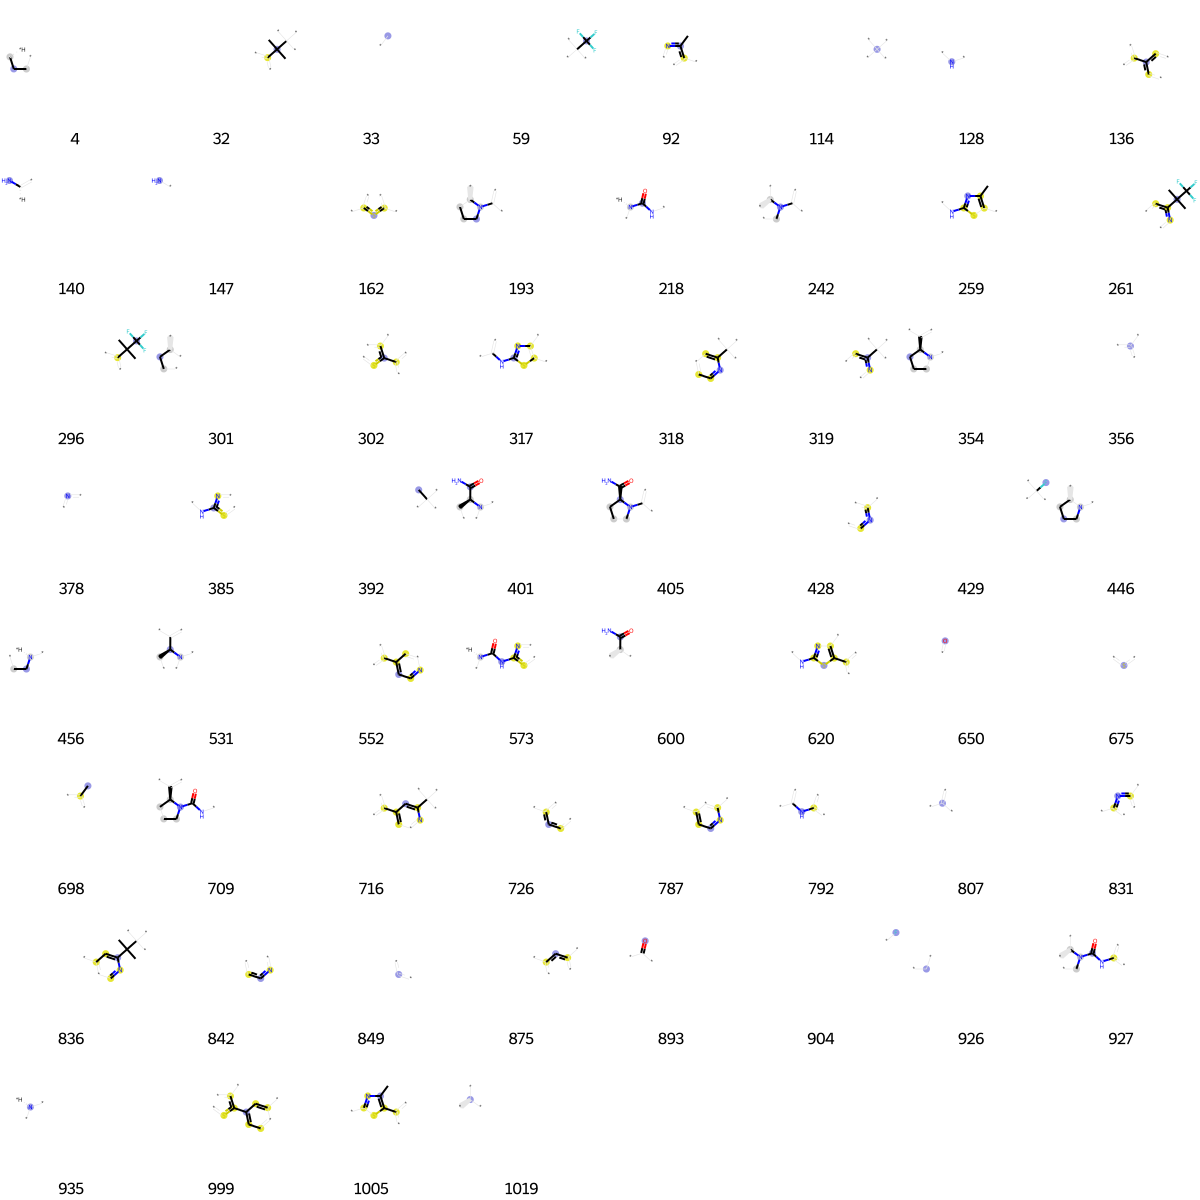

In [461]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [462]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 33,
 73,
 80,
 86,
 90,
 114,
 136,
 147,
 155,
 285,
 286,
 315,
 323,
 340,
 356,
 378,
 386,
 392,
 433,
 448,
 471,
 506,
 527,
 599,
 632,
 646,
 672,
 699,
 721,
 726,
 787,
 802,
 820,
 827,
 831,
 849,
 851,
 896,
 904,
 935,
 953,
 956,
 961,
 964,
 980,
 996,
 997]

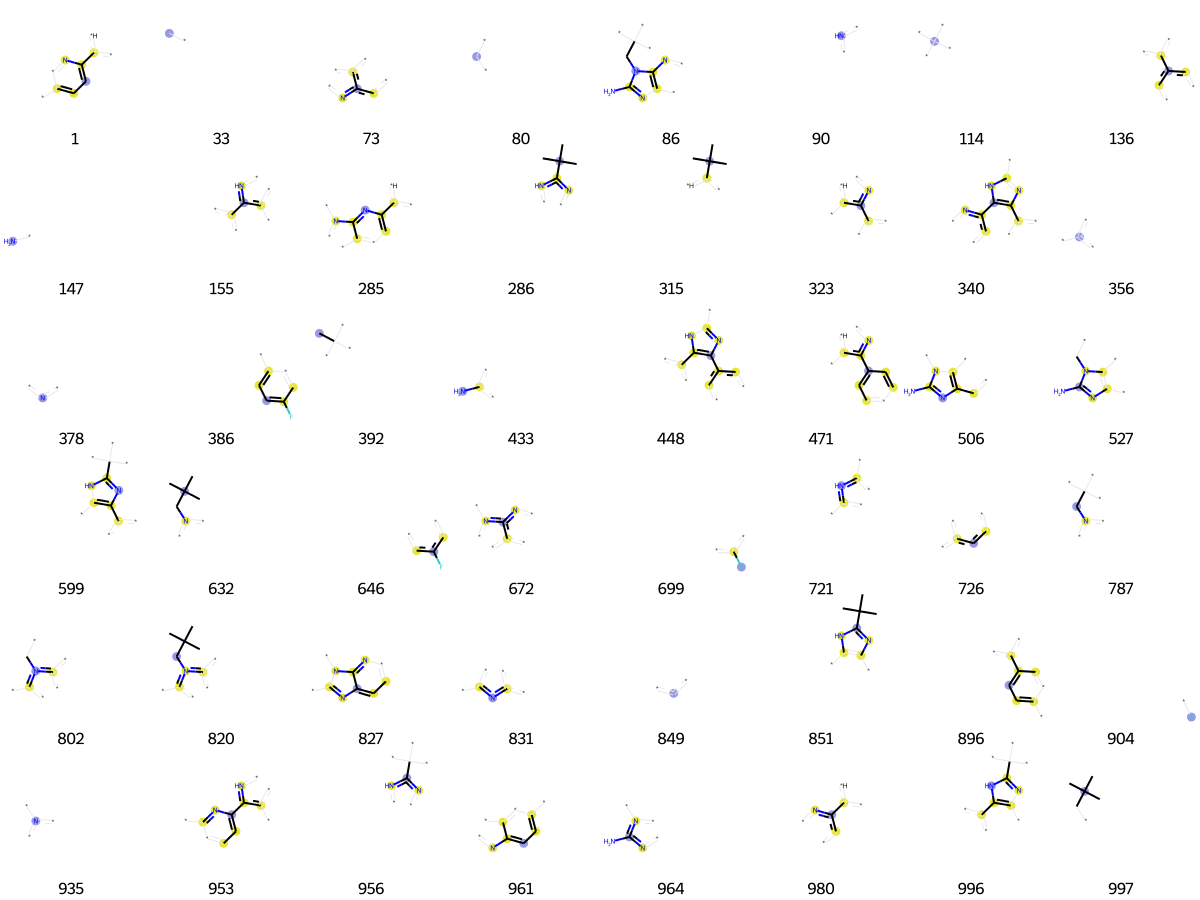

In [463]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [464]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[33,
 36,
 64,
 80,
 139,
 144,
 147,
 175,
 294,
 356,
 389,
 556,
 588,
 650,
 654,
 679,
 726,
 772,
 807,
 810,
 849,
 881,
 893,
 895,
 911,
 926,
 932,
 933,
 970,
 974,
 978,
 981,
 1008,
 1013,
 1019]

In [465]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[4,
 62,
 77,
 80,
 117,
 147,
 222,
 257,
 301,
 304,
 314,
 356,
 367,
 378,
 396,
 424,
 433,
 440,
 485,
 492,
 498,
 511,
 577,
 606,
 650,
 656,
 726,
 807,
 831,
 849,
 863,
 897,
 912,
 926,
 935,
 1018,
 1019]

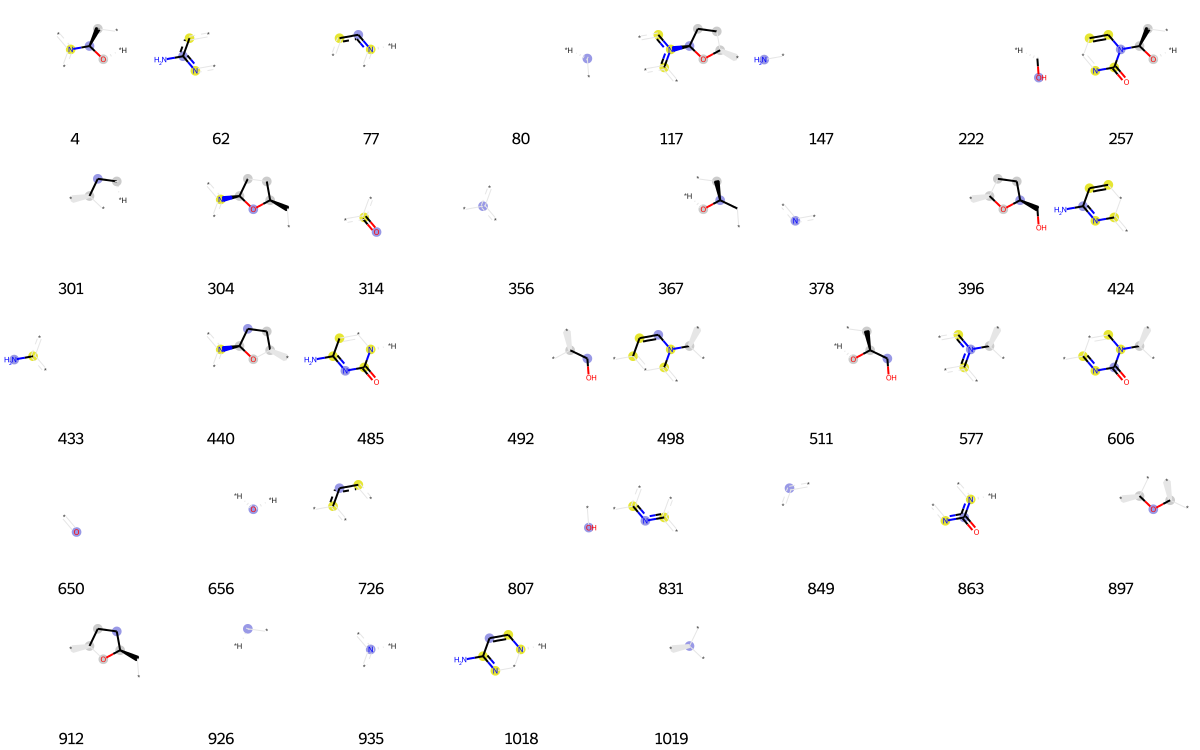

In [466]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [467]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 2,
 4,
 27,
 43,
 65,
 80,
 87,
 90,
 128,
 136,
 137,
 147,
 232,
 276,
 301,
 323,
 324,
 333,
 335,
 339,
 356,
 360,
 378,
 428,
 464,
 479,
 482,
 489,
 511,
 610,
 674,
 682,
 711,
 715,
 726,
 741,
 786,
 790,
 806,
 808,
 849,
 852,
 873,
 890,
 926,
 935,
 944,
 954,
 1019]

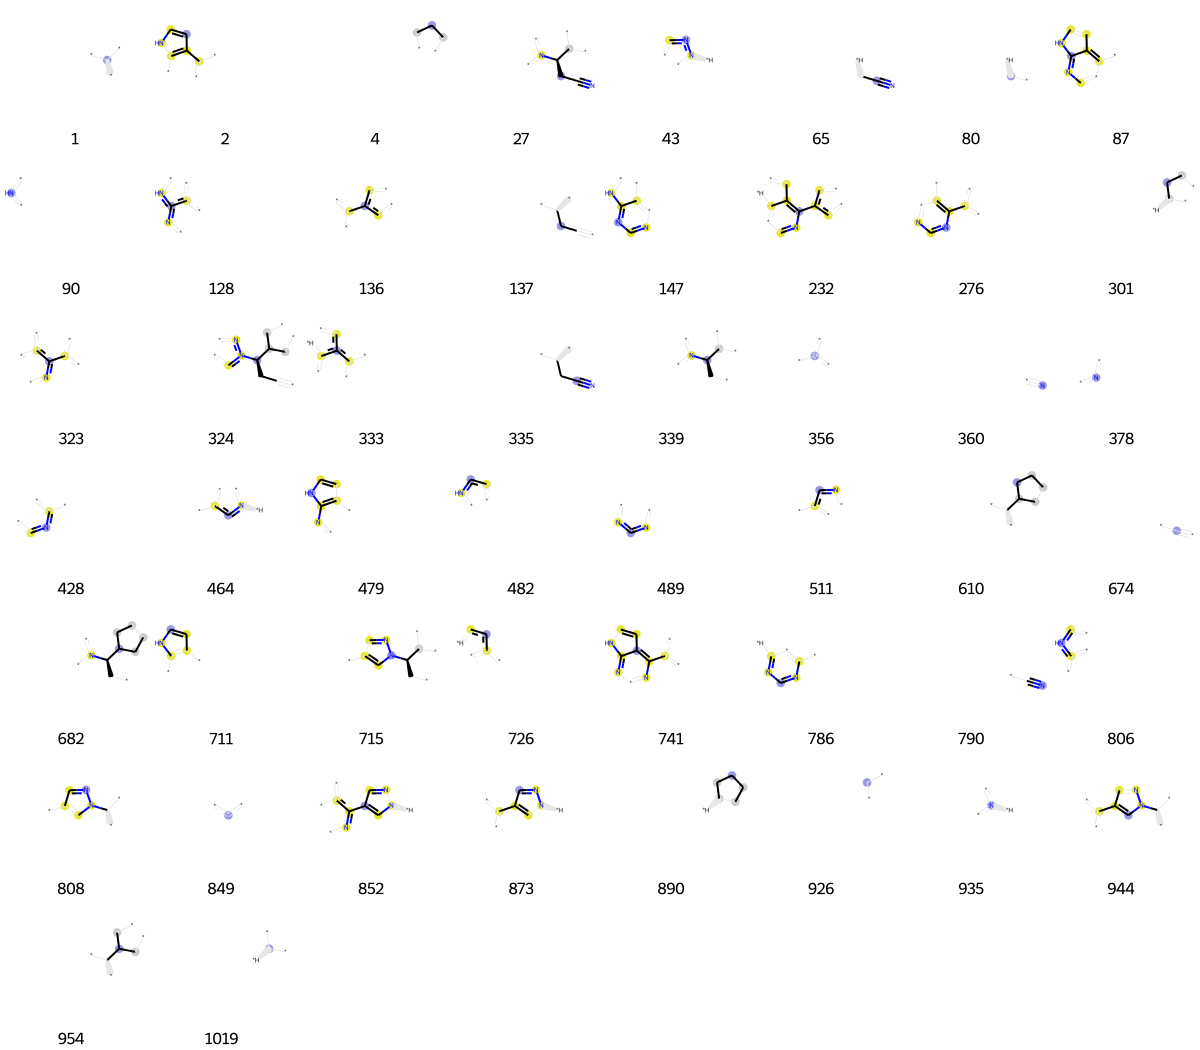

In [468]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [469]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[14,
 33,
 46,
 106,
 114,
 117,
 121,
 136,
 207,
 212,
 233,
 304,
 314,
 315,
 347,
 356,
 361,
 375,
 378,
 389,
 392,
 393,
 416,
 456,
 480,
 487,
 497,
 565,
 650,
 668,
 673,
 726,
 757,
 774,
 801,
 807,
 828,
 849,
 875,
 893,
 896,
 903,
 926,
 932,
 935,
 942,
 947,
 980,
 985]

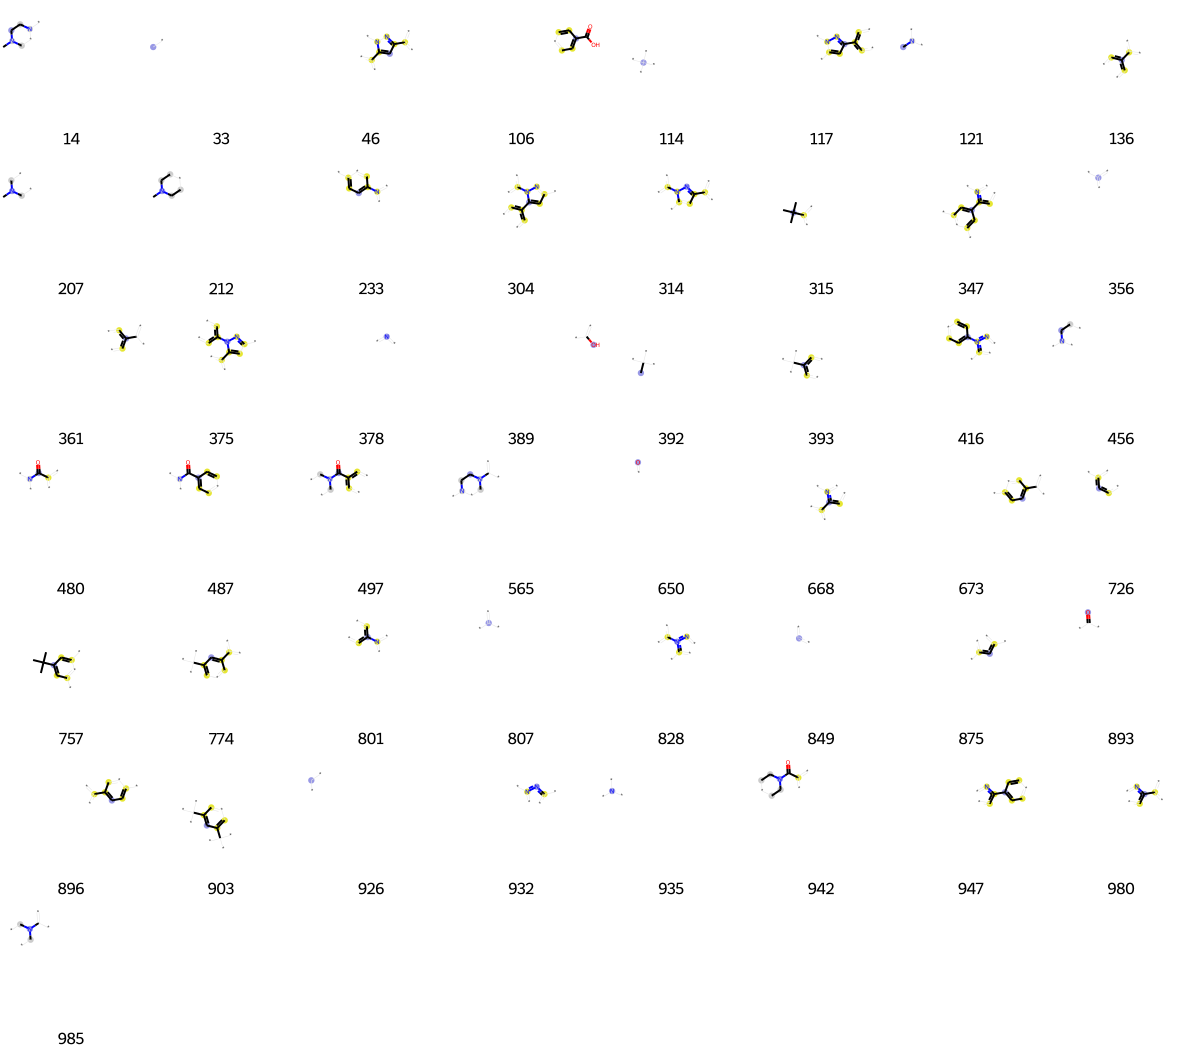

In [470]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [471]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[65,
 80,
 90,
 210,
 250,
 268,
 298,
 305,
 310,
 355,
 356,
 372,
 374,
 378,
 428,
 456,
 511,
 561,
 599,
 619,
 650,
 659,
 715,
 725,
 726,
 730,
 734,
 741,
 753,
 773,
 838,
 840,
 842,
 849,
 885,
 895,
 913,
 926,
 935,
 938,
 939]

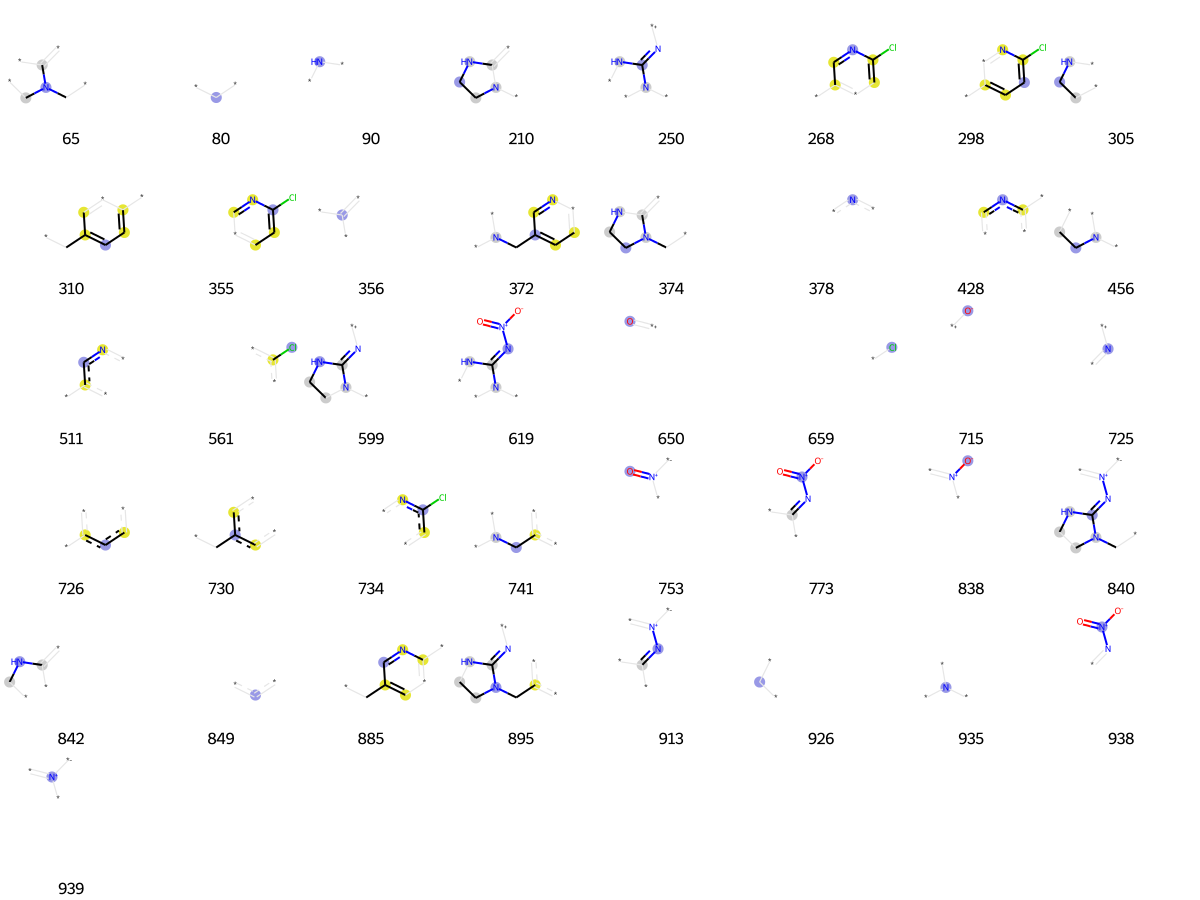

In [472]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [473]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[14,
 33,
 114,
 202,
 208,
 277,
 315,
 356,
 360,
 391,
 392,
 419,
 431,
 468,
 529,
 563,
 578,
 674,
 694,
 722,
 744,
 790,
 803,
 807,
 849,
 875,
 1009]

In [474]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [475]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[9,
 24,
 33,
 73,
 114,
 128,
 136,
 143,
 168,
 191,
 221,
 228,
 248,
 290,
 301,
 322,
 323,
 333,
 350,
 352,
 356,
 360,
 361,
 371,
 378,
 381,
 386,
 389,
 391,
 392,
 401,
 428,
 452,
 454,
 456,
 458,
 485,
 491,
 502,
 511,
 512,
 514,
 516,
 533,
 593,
 606,
 610,
 646,
 650,
 673,
 695,
 699,
 709,
 719,
 726,
 743,
 749,
 767,
 807,
 818,
 831,
 837,
 841,
 849,
 875,
 893,
 896,
 904,
 908,
 911,
 926,
 988,
 997,
 1019]

In [476]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [477]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 33,
 42,
 64,
 80,
 94,
 107,
 108,
 110,
 156,
 175,
 212,
 231,
 242,
 249,
 268,
 333,
 341,
 356,
 361,
 389,
 407,
 428,
 477,
 512,
 531,
 557,
 559,
 568,
 613,
 650,
 690,
 695,
 726,
 730,
 743,
 745,
 757,
 807,
 841,
 849,
 893,
 922,
 926,
 935,
 946,
 950,
 954,
 956,
 969,
 1018,
 1019]

In [478]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [479]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[1,
 3,
 8,
 20,
 21,
 33,
 42,
 57,
 64,
 80,
 92,
 94,
 106,
 140,
 175,
 190,
 193,
 219,
 221,
 227,
 249,
 283,
 310,
 335,
 356,
 378,
 389,
 406,
 412,
 416,
 436,
 501,
 507,
 512,
 531,
 578,
 639,
 669,
 695,
 698,
 726,
 730,
 739,
 756,
 761,
 768,
 807,
 831,
 841,
 849,
 875,
 883,
 887,
 918,
 932,
 935,
 944,
 946,
 978]

In [480]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

RDKit ERROR: [16:55:40] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 11
RDKit ERROR: 


KekulizeException: ignored

In [481]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[1,
 15,
 22,
 33,
 46,
 64,
 79,
 80,
 102,
 112,
 113,
 114,
 117,
 128,
 183,
 190,
 214,
 216,
 223,
 236,
 283,
 305,
 310,
 311,
 320,
 341,
 348,
 356,
 360,
 378,
 392,
 393,
 428,
 429,
 476,
 494,
 511,
 546,
 548,
 557,
 561,
 610,
 622,
 641,
 650,
 658,
 659,
 674,
 680,
 695,
 710,
 712,
 726,
 730,
 790,
 807,
 809,
 816,
 849,
 857,
 875,
 879,
 893,
 904,
 951,
 997]

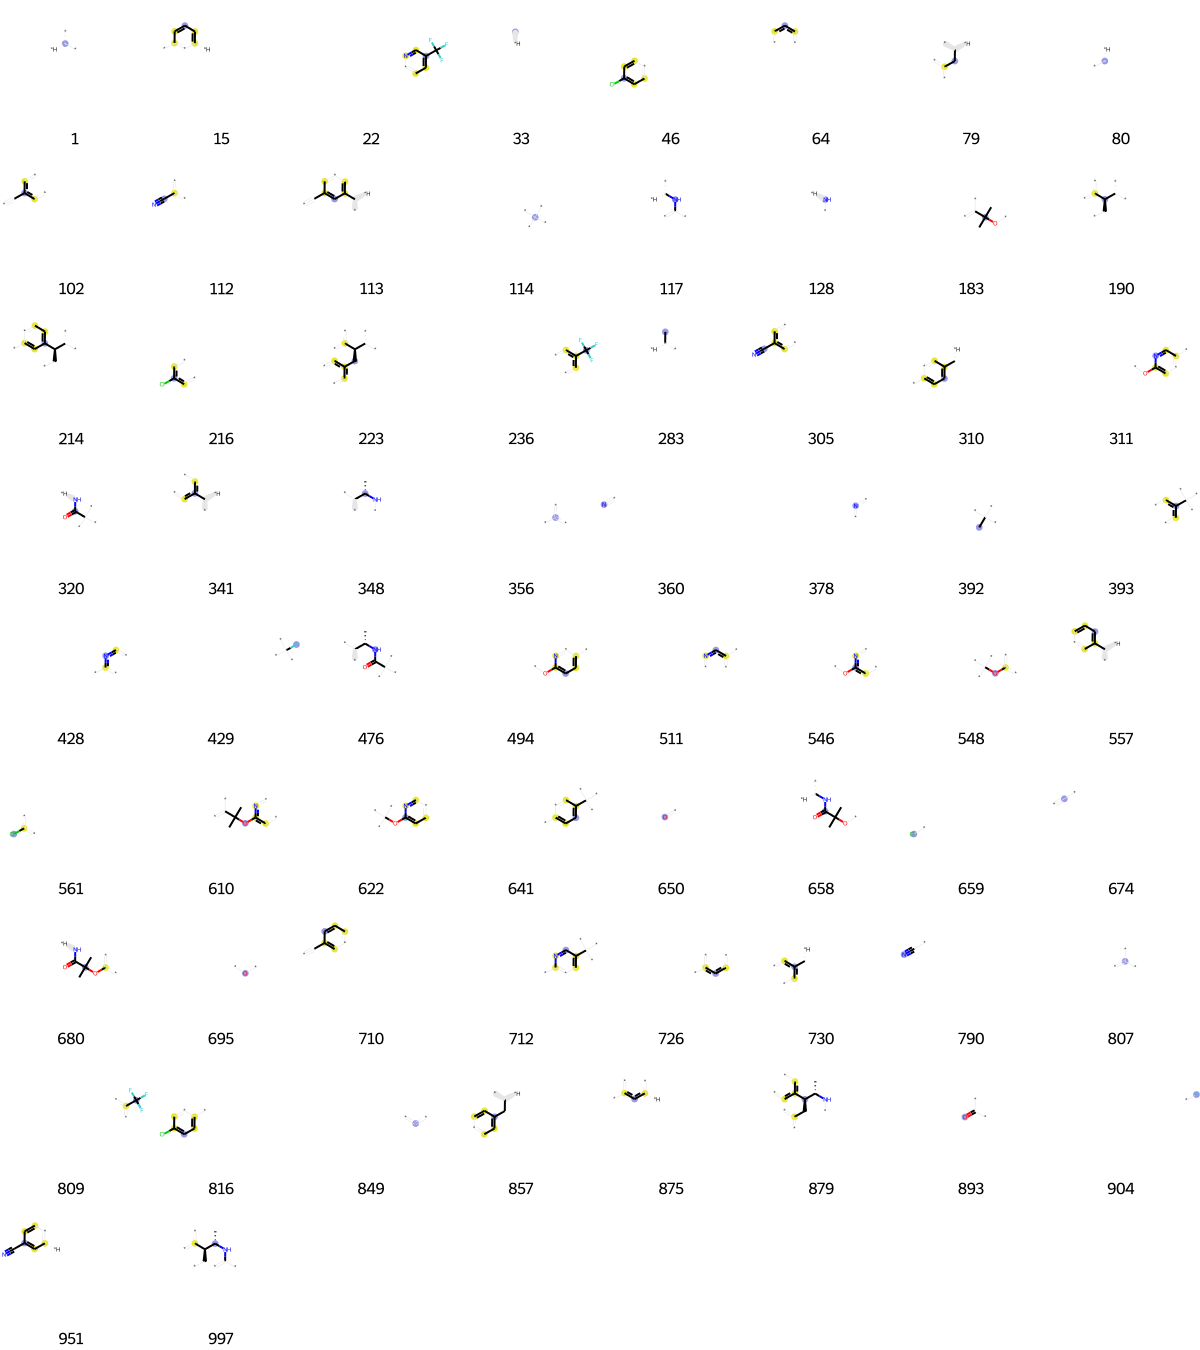

In [482]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])